<div style="color: #77C3EC; font-size:30px; text-align:center;">Farah Mathlouthi: Fraud Detection Analysis Project</div>

<div style="color: #48AAAD; font-size:24px; text-align:center;">Loading The Dataset + Data Exploration</div>

In [1]:
#selecting the working directory
setwd("C:/R Project")
getwd()

[1] "C:/R Project"

<div style="color: #1C05B3; font-size:16px; text-align:left;">
    <h2>Initial Columns:</h2>
Transaction ID: A unique identifier for each transaction.</br>
Customer ID: A unique identifier for each customer.</br>
Transaction Amount: The total amount of money exchanged in the transaction.</br>
Transaction Date: The date and time when the transaction took place.</br>
Payment Method: The method used to complete the transaction (e.g., credit card, PayPal, etc.).</br>
Product Category: The category of the product involved in the transaction.</br>
Quantity: The number of products involved in the transaction.</br>
Customer Age: The age of the customer making the transaction.</br>
Customer Location: The geographical location of the customer.</br>
Device Used: The type of device used to make the transaction (e.g., mobile, desktop).</br>
IP Address: The IP address of the device used for the transaction.</br>
Shipping Address: The address where the product was shipped.</br>
Billing Address: The address associated with the payment method.</br>
Is Fraudulent: A binary indicator of whether the transaction is fraudulent (1 for fraudulent, 0 for legitimate).</br>
Account Age Days: The age of the customer's account in days at the time of the transaction.</br>
Transaction Hour: The hour of the day when the transaction occurred.</div>

In [2]:
library(RColorBrewer)
library(ggplot2)
library(dplyr)
library(plotrix)
library(corrplot)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.88 loaded


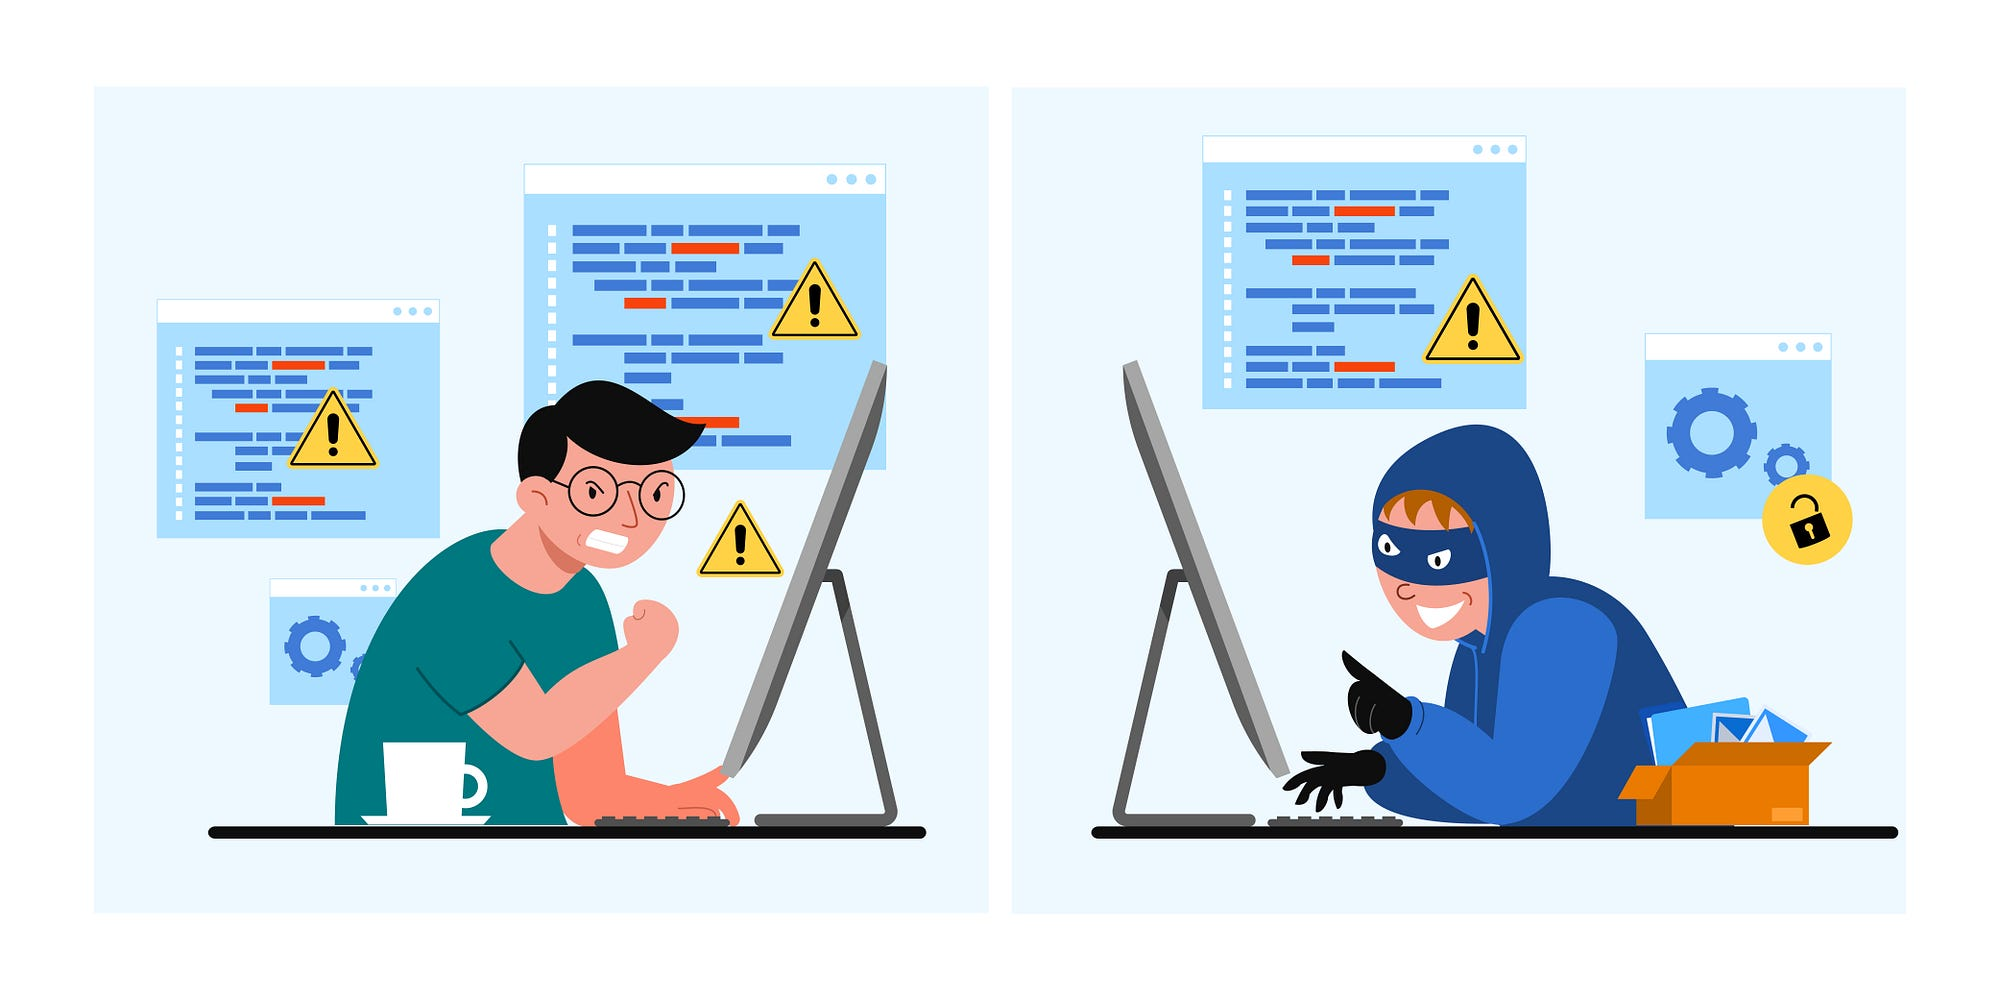

In [3]:
fraud1 = read.csv("C:/R Project/Fraudulent_E-Commerce_Transaction_Data.csv", sep=",",dec=".", header=TRUE, stringsAsFactors=TRUE)

In [4]:
head(fraud1)

Transaction.ID,Customer.ID,Transaction.Amount,Transaction.Date,Payment.Method,Product.Category,Quantity,Customer.Age,Customer.Location,Device.Used,IP.Address,Shipping.Address,Billing.Address,Is.Fraudulent,Account.Age.Days,Transaction.Hour
15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058 DPO AA 05437,Unit 8934 Box 0058 DPO AA 05437,0,30,5
0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys Port Cherylview, NV 75063","634 May Keys Port Cherylview, NV 75063",0,72,8
e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790 Rothhaven, IL 15564","16282 Dana Falls Suite 790 Rothhaven, IL 15564",0,63,3
4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646 New Joshua, UT 84798","828 Strong Loaf Apt. 646 New Joshua, UT 84798",0,124,20
074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439 West Richardtown, OH 36093","29799 Jason Hills Apt. 439 West Richardtown, OH 36093",0,158,5
4e707452-7c8a-4cbd-b0c1-2aeaa35c5e88,29616b04-2d5c-4729-9c9d-8d71a6ad9dc1,166.41,2024-01-30 10:55:14,bank transfer,toys & games,2,34,Herreramouth,tablet,202.237.29.55,"5699 Brittany Villages Suite 903 Lake Tim, MD 46274","120 Kristi Dale Port Meganshire, GU 03060",0,38,10


In [5]:
fraud2 = read.csv("C:/R Project/Fraudulent_E-Commerce_Transaction_Data_2.csv", sep=",",dec=".", header=TRUE, stringsAsFactors=TRUE)

In [6]:
head(fraud2)

Transaction.ID,Customer.ID,Transaction.Amount,Transaction.Date,Payment.Method,Product.Category,Quantity,Customer.Age,Customer.Location,Device.Used,IP.Address,Shipping.Address,Billing.Address,Is.Fraudulent,Account.Age.Days,Transaction.Hour
c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,"5399 Rachel Stravenue Suite 718 North Blakeburgh, IL 78600","5399 Rachel Stravenue Suite 718 North Blakeburgh, IL 78600",0,282,23
7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge Collinsbury, PR 81853","5230 Stephanie Forge Collinsbury, PR 81853",0,223,0
f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval Port Larry, IA 58422","4772 David Stravenue Apt. 447 Velasquezside, KS 67650",0,360,8
e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square West Brenda, NV 23016","7609 Cynthia Square West Brenda, NV 23016",0,325,20
7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313 Robinsonport, AS 52039","2494 Robert Ramp Suite 313 Robinsonport, AS 52039",0,116,15
5da506fe-d4df-474a-b773-146333f06cfe,03033baf-2bcc-4608-b5b8-9c86976f4948,345.27,2024-02-22 13:49:27,PayPal,toys & games,1,9,Johnsonmouth,desktop,158.48.161.135,"PSC 3832, Box 5265 APO AE 85694","PSC 3832, Box 5265 APO AE 85694",0,251,13


In [7]:
#les noms de colonnes pour les 2 dataframes
names(fraud1)
names(fraud2)

[1] "Transaction.ID"     "Customer.ID"        "Transaction.Amount"
 [4] "Transaction.Date"   "Payment.Method"     "Product.Category"  
 [7] "Quantity"           "Customer.Age"       "Customer.Location" 
[10] "Device.Used"        "IP.Address"         "Shipping.Address"  
[13] "Billing.Address"    "Is.Fraudulent"      "Account.Age.Days"  
[16] "Transaction.Hour"

[1] "Transaction.ID"     "Customer.ID"        "Transaction.Amount"
 [4] "Transaction.Date"   "Payment.Method"     "Product.Category"  
 [7] "Quantity"           "Customer.Age"       "Customer.Location" 
[10] "Device.Used"        "IP.Address"         "Shipping.Address"  
[13] "Billing.Address"    "Is.Fraudulent"      "Account.Age.Days"  
[16] "Transaction.Hour"

In [8]:
class(fraud1)

[1] "data.frame"

In [9]:
fraud1 <- na.omit(fraud1)
dim(fraud1)

[1] 1472952      16

In [10]:
#la dimension des 2 dataframes
dim(fraud1)
dim(fraud2)

[1] 1472952      16

[1] 23634    16

In [11]:
#d’afficher la structure de chacune des colonnes
str(fraud1)

'data.frame':	1472952 obs. of  16 variables:
 $ Transaction.ID    : Factor w/ 1472952 levels "00000d71-ae44-44b6-ba0d-96f4435308bb",..: 124946 68521 1320638 448240 41479 451431 729836 63842 179443 363058 ...
 $ Customer.ID       : Factor w/ 1472952 levels "00000b1f-6bbc-45e6-bdf3-c98631fbf683",..: 1206104 321368 159487 203513 397206 238246 1462368 13146 1389193 982176 ...
 $ Transaction.Amount: num  58.1 390 134.2 226.2 121.5 ...
 $ Transaction.Date  : Factor w/ 1346684 levels "2024-01-01 00:00:00",..: 724699 798050 1113058 1094524 204823 424954 502457 729169 906307 229024 ...
 $ Payment.Method    : Factor w/ 4 levels "bank transfer",..: 1 3 4 1 1 1 4 2 1 1 ...
 $ Product.Category  : Factor w/ 5 levels "clothing","electronics",..: 2 2 4 1 1 5 5 3 4 3 ...
 $ Quantity          : int  1 2 2 5 2 2 2 4 4 4 ...
 $ Customer.Age      : int  17 40 22 31 51 34 14 42 38 39 ...
 $ Customer.Location : Factor w/ 99135 levels "Aaronberg","Aaronborough",..: 664 17314 6791 36745 82692 21734 72130 64974

In [12]:
#pour avoir une idée sur la distribution des différentes variables.
summary(fraud1)

                              Transaction.ID   
 00000d71-ae44-44b6-ba0d-96f4435308bb:      1  
 00003e70-3593-41ea-9d08-ffe6a546f469:      1  
 00004f68-1158-43b9-9f12-99c2f20566f7:      1  
 00005533-4c45-47ce-a287-17102b963a58:      1  
 00006c43-0082-4a6d-9e47-fe2b5487a641:      1  
 00006cc6-4a52-410d-99f5-e7b78864eb81:      1  
 (Other)                             :1472946  
                               Customer.ID      Transaction.Amount
 00000b1f-6bbc-45e6-bdf3-c98631fbf683:      1   Min.   :   10.00  
 00002f8f-08b1-4e56-a8a6-c89e195ee9a1:      1   1st Qu.:   68.61  
 0000438e-38a8-46f0-bef1-a38e9bf5c857:      1   Median :  151.76  
 000077fe-2812-442c-a79e-75bad41b5a0c:      1   Mean   :  226.77  
 00007ea2-570b-459c-ad1d-b6f3b6baf8b5:      1   3rd Qu.:  296.05  
 000083c5-5d77-4e94-9462-45e9381e7373:      1   Max.   :12701.75  
 (Other)                             :1472946                     
            Transaction.Date         Payment.Method          Product.Category 
 

<div style="color: #4169E1; font-size:30px; text-align:center;">Analyses Univariés</div>

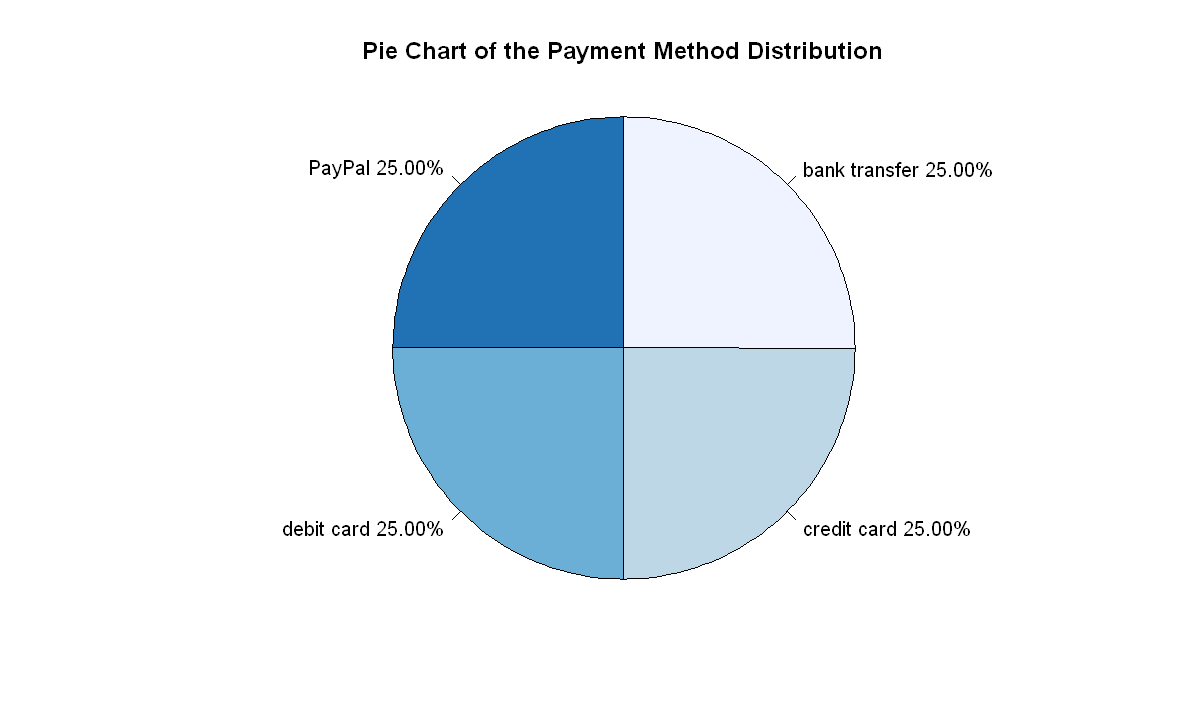

In [13]:
#calculates the frequency of each unique payment method:
r = c (table (factor(fraud1$Payment.Method)))
#calculates the percentage of each payment method relative to the total number of transactions:
prc= round(r/nrow(fraud1)*100)
prc1 <- sprintf("%.2f%%", prc)
#extracts the unique levels (payment methods) from the column:
q=(levels(fraud1$Payment.Method))
#sets the dimensions of the plot:
options(repr.plot.width = 10, repr.plot.height = 6)
blue_palette = brewer.pal(n = 4, name = "Blues")
pie(x=r, labels = paste(q ,prc1) , radius = 1,main = "Pie Chart of the Payment Method Distribution", clockwise = T, col= blue_palette )


<div style="color: #133BBE; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
    The pie chart visually represents the distribution of payment methods used in the fraud1 data.<br>
    Each slice of the pie corresponds to a payment method.<br>
    The size of each slice represents the proportion of transactions associated with that payment method relative to the total number of transactions.<br>
    The labels on each slice display the payment method name along with its percentage of the total transactions.<br>
    The color palette used (shades of blue) distinguishes between different payment methods.<br>
    => With equal parts for each method ( 25% ), it suggests a uniform distribution of payment methods among the transactions.
</div>

In [14]:
# Calculateing payment count => the same method as the table() function
payment_count <- fraud1 %>% 
  group_by(`Payment.Method`) %>% 
  summarise(count = n())
head(payment_count)
pay1 <- c(table(fraud1$Payment.Method))
print(pay1)

Payment.Method,count
bank transfer,368278
credit card,368429
debit card,368277
PayPal,367968


bank transfer   credit card    debit card        PayPal 
       368278        368429        368277        367968 


In [15]:
# Calculate payment count by Customer.Location
payment_count <- fraud1 %>% 
  count(`Customer.Location`) %>%
  arrange(desc(n))  # Arrange the locations in descending order of frequency

# Print the ordered payment count
print(payment_count)

# Alternatively, if you want to keep it in table format:
# Calculate payment count by Customer.Location
payment_count_table <- table(fraud1$Customer.Location)
payment_count_table <- payment_count_table[order(-payment_count_table)]  # Order the table in descending order of frequency

# Print the ordered payment count table
print(payment_count_table)

# A tibble: 99,135 x 2
   Customer.Location     n
   <fct>             <int>
 1 New Michael        1258
 2 South Michael      1209
 3 East Michael       1206
 4 Port Michael       1204
 5 West Michael       1201
 6 Lake Michael       1198
 7 North Michael      1162
 8 Michaelmouth        891
 9 West David          869
10 New David           855
# ... with 99,125 more rows


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



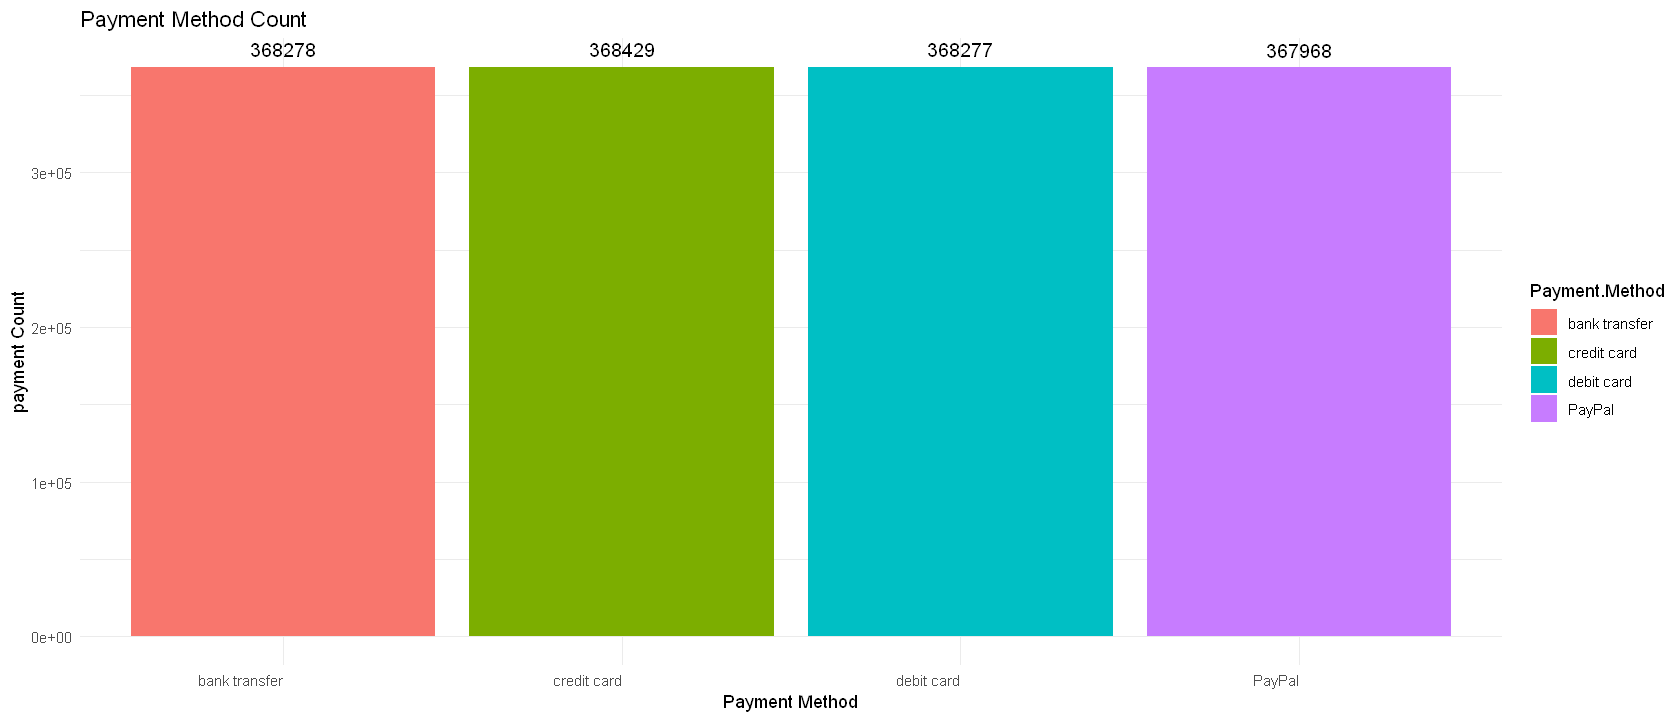

In [16]:
# sets the x-axis variable to the Payment.Method column + specifies that the fill color of the bars should be based on this Column Distribution also
bar_plot <- ggplot(fraud1, aes(x = `Payment.Method`, fill = `Payment.Method`)) +
  geom_bar() +
#calculate the count of observations for each category and use it as the label for each bar
  geom_text(stat = "count", aes(label = ..count..),
            vjust = -0.7, color = "black", size = 4) + 
#sets the overall appearance of the plot to a minimal theme
  theme_minimal() +
  theme(axis.text.x = element_text( hjust = 1)) +
  labs(x = "Payment Method", y = "payment Count", title = "Payment Method Count")
options(repr.plot.width = 14, repr.plot.height = 6)

print(bar_plot)


<div style="color: #4B0082; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
 The bar plot visualizes the count of transactions for each payment method in the fraud1 data frame.
Each bar represents a payment method, and the height of the bar corresponds to the count of transactions associated with that payment method.
Text labels above each bar display the exact count of transactions for each payment method. the counts here are equal with slight difference and in the order of 3680XXXX for each Payment Method
</div>

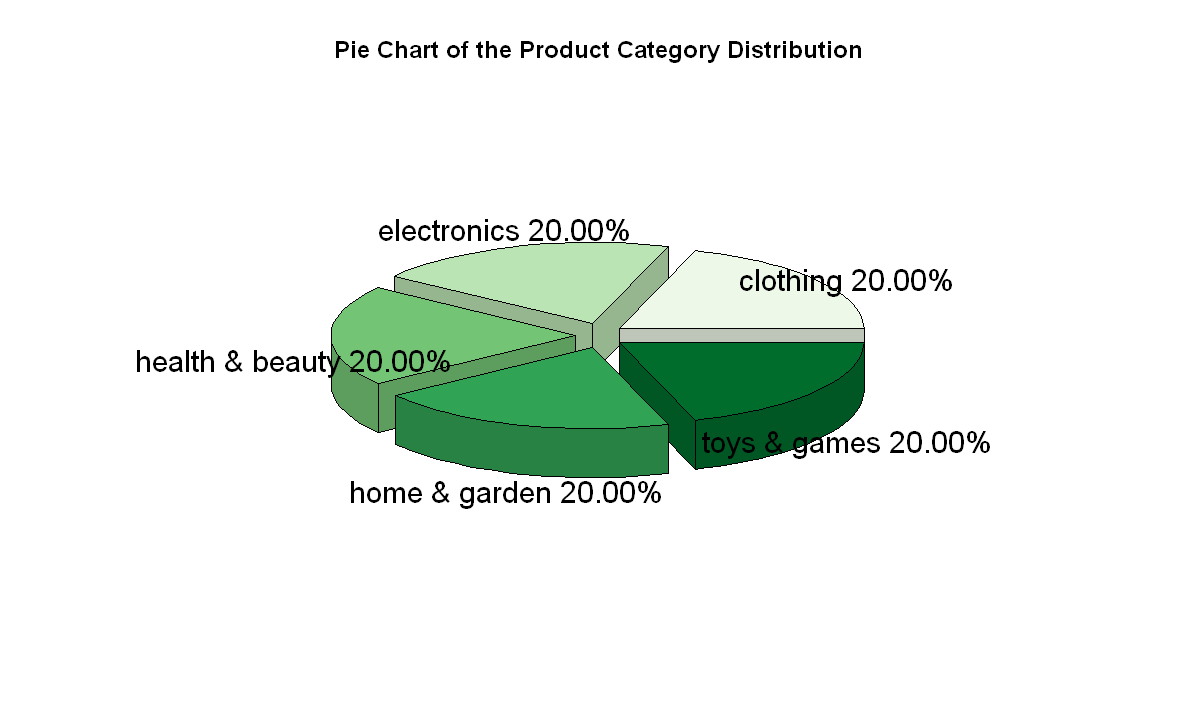

In [17]:
#calculates the frequency of each unique product category
f =  c (table(factor(fraud1$Product.Category)))
#extracts the unique levels (categories) from the Product.Category column
g = (levels(fraud1$Product.Category))
#alculates the percentage of each category relative to the total number of observations
prc3 = round(f / nrow(fraud1)*100)
prc4 <- sprintf("%.2f%%", prc3)
# Define a green color palette
green_palette <- brewer.pal(n = 5, name = "Greens")
options(repr.plot.width = 10, repr.plot.height = 6)
pie3D(f, explode= 0.1, labels = paste(g , prc4), col = green_palette, main = "Pie Chart of the Product Category Distribution")

<div style="color: #006400; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
The resulting pie chart visually represents the distribution of product categories in the fraud1 dataset.
Each slice of the pie corresponds to a product category, with the size of the slice representing the proportion of transactions associated with that category => equal Distribution 
The 3D effect adds depth to the visualization, making it more engaging and visually appealing.
</div>

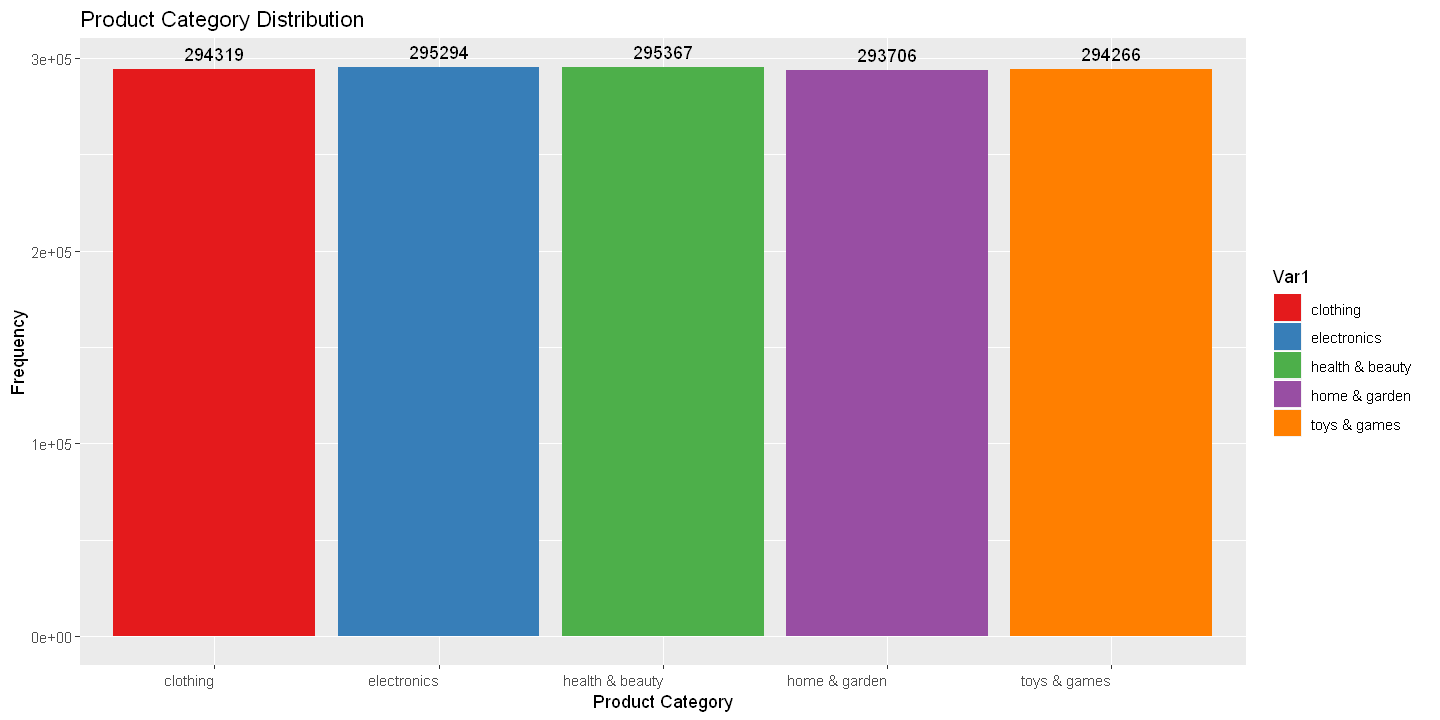

In [18]:
# Create a data frame with counts and percentages for each product category
product_counts <- as.data.frame(table(fraud1$Product.Category))
# Create a bar plot
bar_plot <- ggplot(product_counts, aes(x = Var1, y = Freq, fill = Var1)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste(Freq)), vjust = -0.6) +
  labs(x = "Product Category", y = "Frequency", title = "Product Category Distribution") +
  theme(axis.text.x = element_text( hjust = 1)) +
  scale_fill_brewer(palette = "Set1") 
options(repr.plot.width = 12, repr.plot.height = 6)
# Show the plot
print(bar_plot)

<div style="color: #4B0082; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
 The bar plot represents the distribution of product categories in the dataset fraud1.
 Each bar in the plot represents a different product category. The height of each bar indicates the frequency or count of transactions associated with that particular product category.
<br>=>The counts here are equal with slight difference and in the order of 29XXXXX for each Product Category
</div>

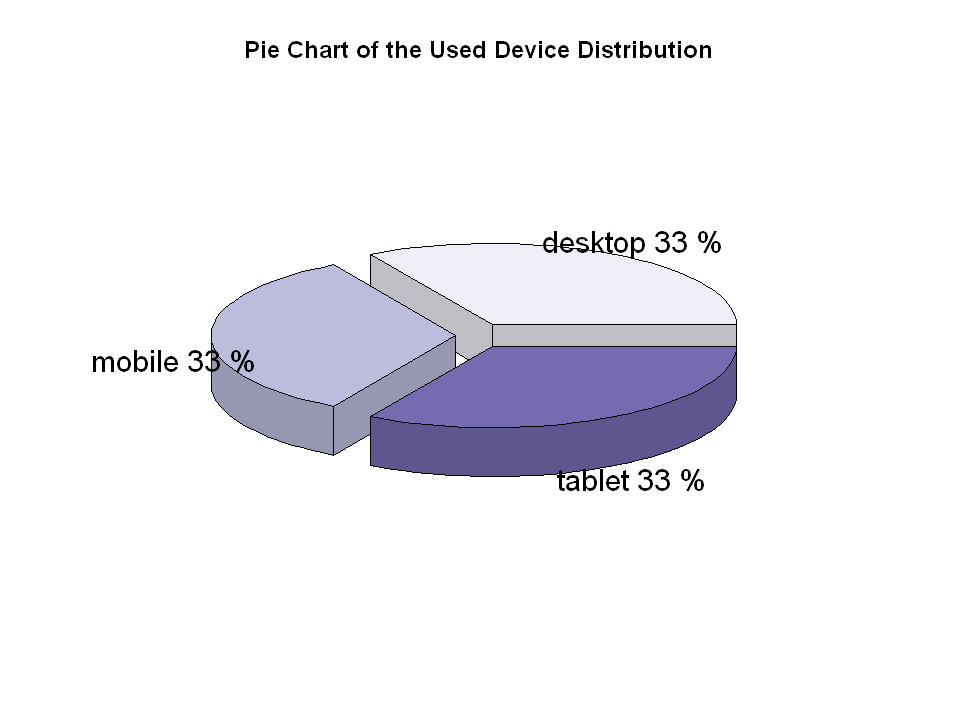

In [19]:
d =  c (table(factor(fraud1$Device.Used)))
e = (levels(fraud1$Device.Used))
prc1 = round(d / nrow(fraud1)*100)
prc2 <- sprintf("%.2f%%", prc1)
# Define a purple color palette
purple_palette <- brewer.pal(n = 3, name = "Purples")
options(repr.plot.width = 8, repr.plot.height = 6)
pie3D(d, explode= 0.1, labels = paste(e , prc1 ,"%"), col = purple_palette, main = "Pie Chart of the Used Device Distribution")

<div style="color: #9955BB; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
    The pie chart visually represents the distribution of Used Devices used in the fraud1 data.<br>
    Each slice of the pie corresponds to a Device Type.<br>
    The size of each slice represents the proportion of transactions associated with that Used Device relative to the total number of transactions.<br>
    The labels on each slice display the Used Device name along with its percentage of the total transactions.<br>
    The color palette used (shades of purple) distinguishes between different Used Devices.<br>
    => With equal parts for each method ( 25% ), it suggests a uniform distribution of payment methods among the transactions.
</div>

In [20]:
#binding the 2 datasets
fraud <- rbind(fraud1, fraud2)

In [21]:
head(fraud)
dim(fraud)

Transaction.ID,Customer.ID,Transaction.Amount,Transaction.Date,Payment.Method,Product.Category,Quantity,Customer.Age,Customer.Location,Device.Used,IP.Address,Shipping.Address,Billing.Address,Is.Fraudulent,Account.Age.Days,Transaction.Hour
15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058 DPO AA 05437,Unit 8934 Box 0058 DPO AA 05437,0,30,5
0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys Port Cherylview, NV 75063","634 May Keys Port Cherylview, NV 75063",0,72,8
e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790 Rothhaven, IL 15564","16282 Dana Falls Suite 790 Rothhaven, IL 15564",0,63,3
4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646 New Joshua, UT 84798","828 Strong Loaf Apt. 646 New Joshua, UT 84798",0,124,20
074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439 West Richardtown, OH 36093","29799 Jason Hills Apt. 439 West Richardtown, OH 36093",0,158,5
4e707452-7c8a-4cbd-b0c1-2aeaa35c5e88,29616b04-2d5c-4729-9c9d-8d71a6ad9dc1,166.41,2024-01-30 10:55:14,bank transfer,toys & games,2,34,Herreramouth,tablet,202.237.29.55,"5699 Brittany Villages Suite 903 Lake Tim, MD 46274","120 Kristi Dale Port Meganshire, GU 03060",0,38,10


[1] 1496586      16

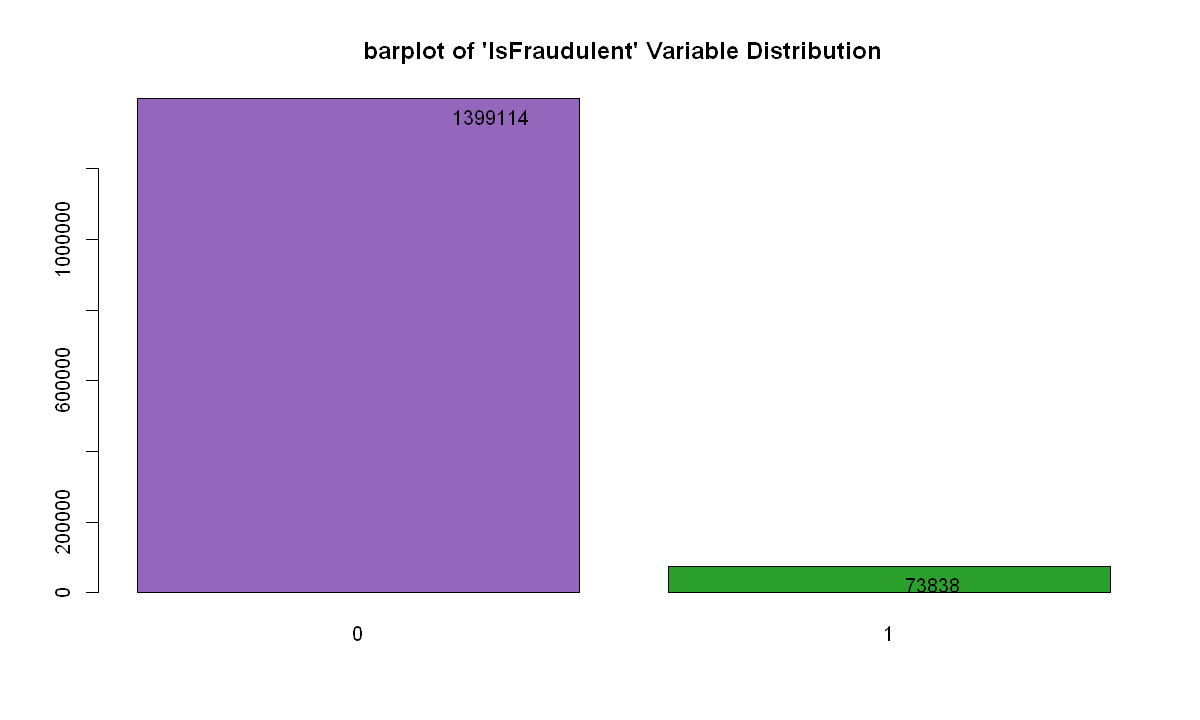

In [22]:
color_palette <- c("#9467bd", "#2ca02c") 
#calculates the frequencies of each unique value (0 and 1) 
t = c(table(fraud1$Is.Fraudulent))
options(repr.plot.width = 10, repr.plot.height = 6)
barplot(t , col=color_palette, main="barplot of 'IsFraudulent' Variable Distribution")
text(x = 1:length(t), y = t , labels = t , pos = 1, cex = 1, col = "black")

<div style="color: #9955BB; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
    The resulting bar plot visually represents the distribution of the 'Is.Fraudulent' variable in the fraud1 dataset.
There are two bars in the plot, each representing one of the two unique values of the Is.Fraudulent variable (0 and 1).
The heights of the bars correspond to the frequencies of the respective values => we see that only a small count ( 73838 ) is a Fraudulent transaction .
</div>

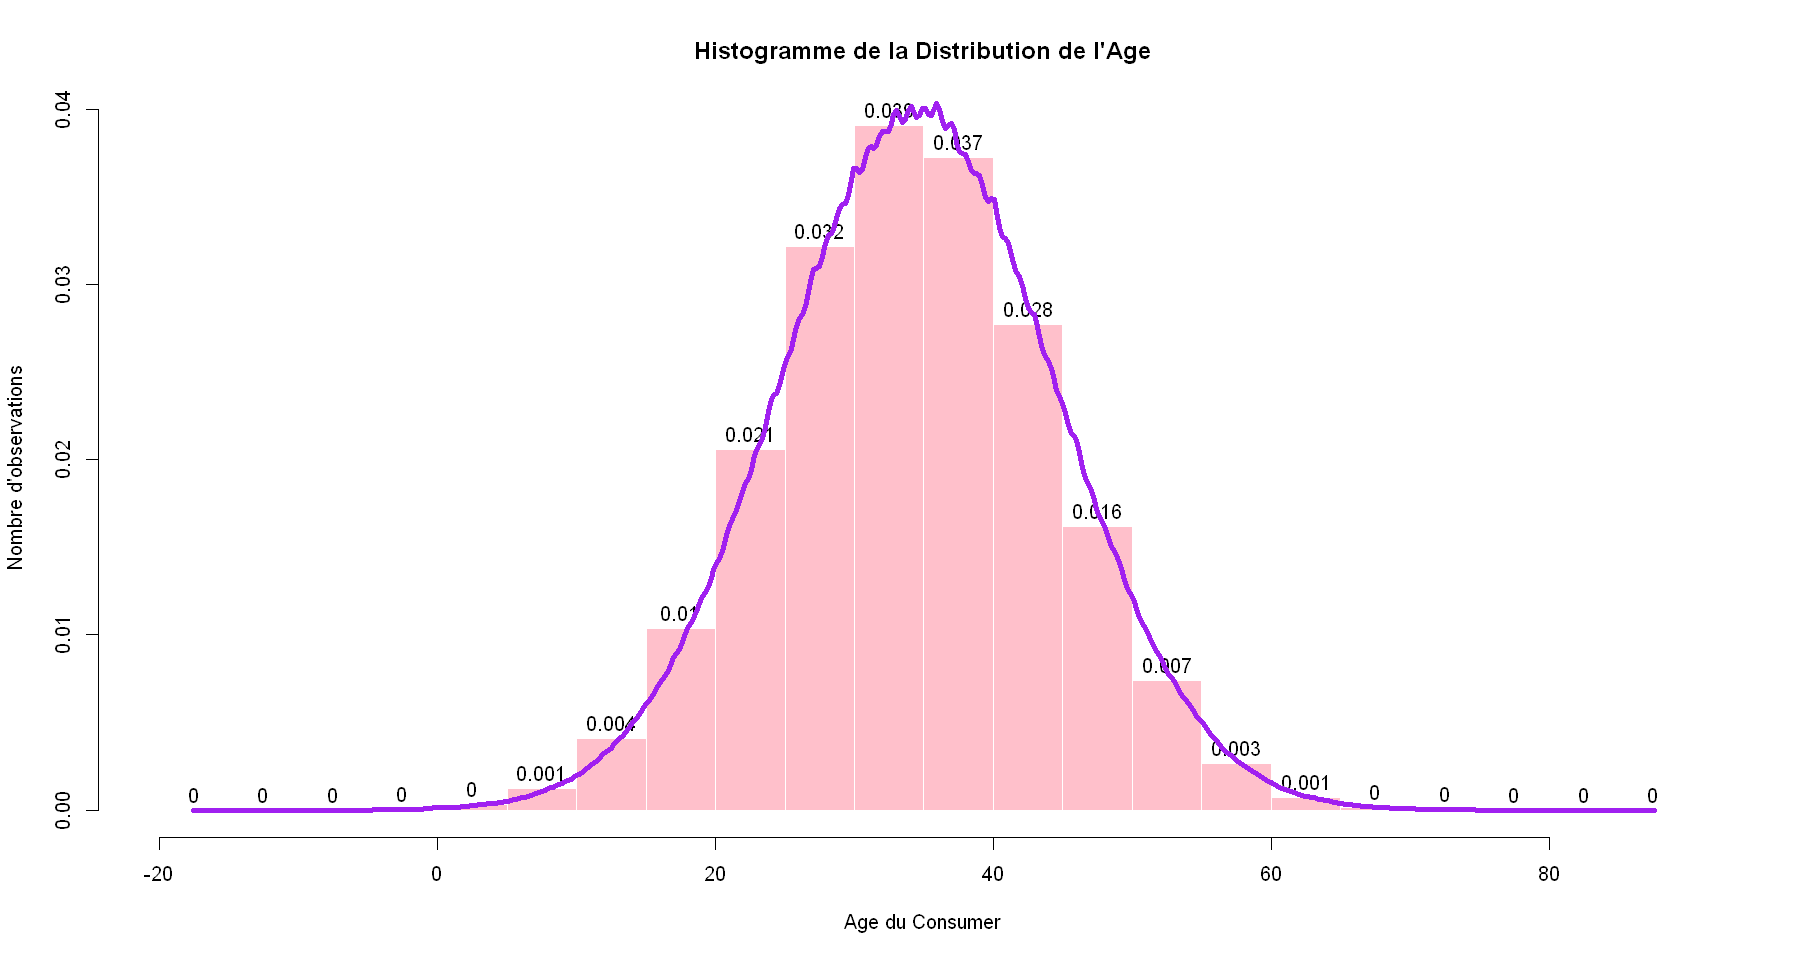

In [23]:
#Variable Continue
options(repr.plot.width = 15, repr.plot.height = 8)
hist (fraud1$Customer.Age, col= "pink", border= "white", labels=TRUE, xlab="Age du Consumer", ylab= "Nombre d'observations", main = "Histogramme de la Distribution de l'Age" , prob=TRUE)
#adds a density line to the histogram + calculates the kernel density estimate
lines(density(fraud1$Customer.Age), lwd=4, col = "purple" )


<div style="color: #9955BB; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
    The histogram provides a visual representation of the distribution of customer ages in the dataset.
Each bar represents a range of ages, and the height of each bar corresponds to the frequency or probability of occurrence of ages within that range.
The density line overlaid on the histogram shows the estimated probability density function of the age distribution
   => The most Important Age Category is between 25 and 40 year Olds
</div>

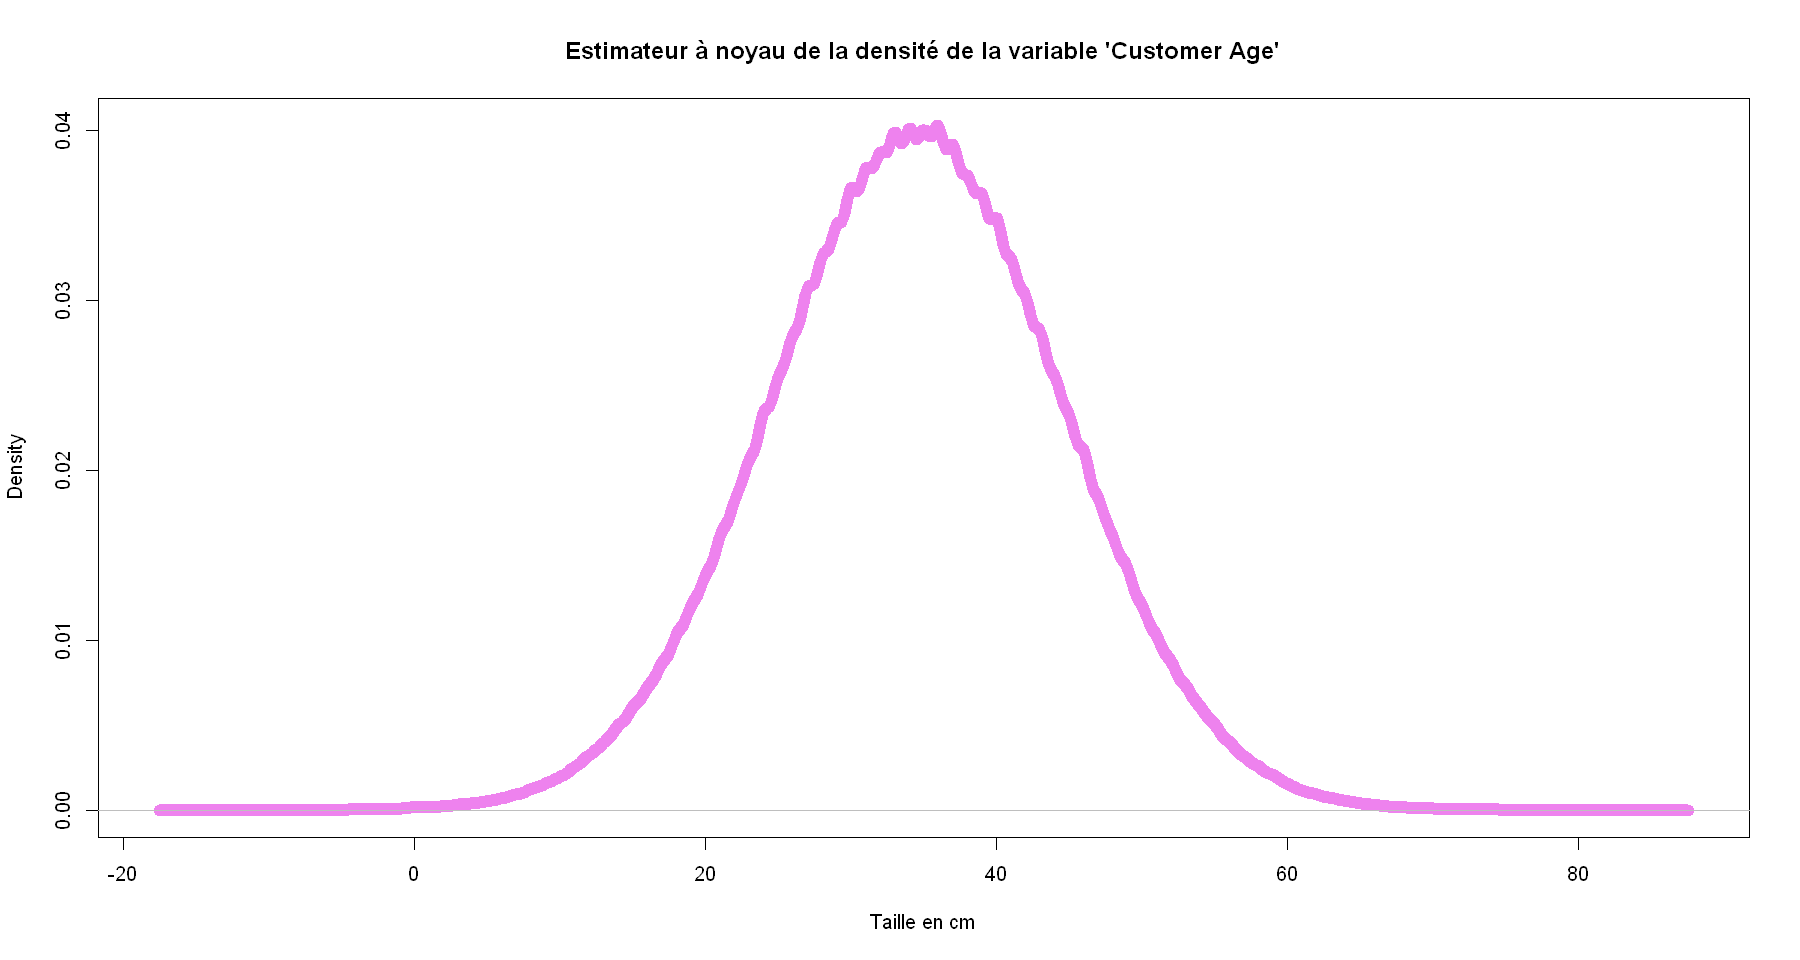

In [24]:
plot(density(fraud1$Customer.Age), main="Estimateur à noyau de la densité de la variable 'Customer Age'",
xlab="Taille en cm" , col = "violet", lwd=10)

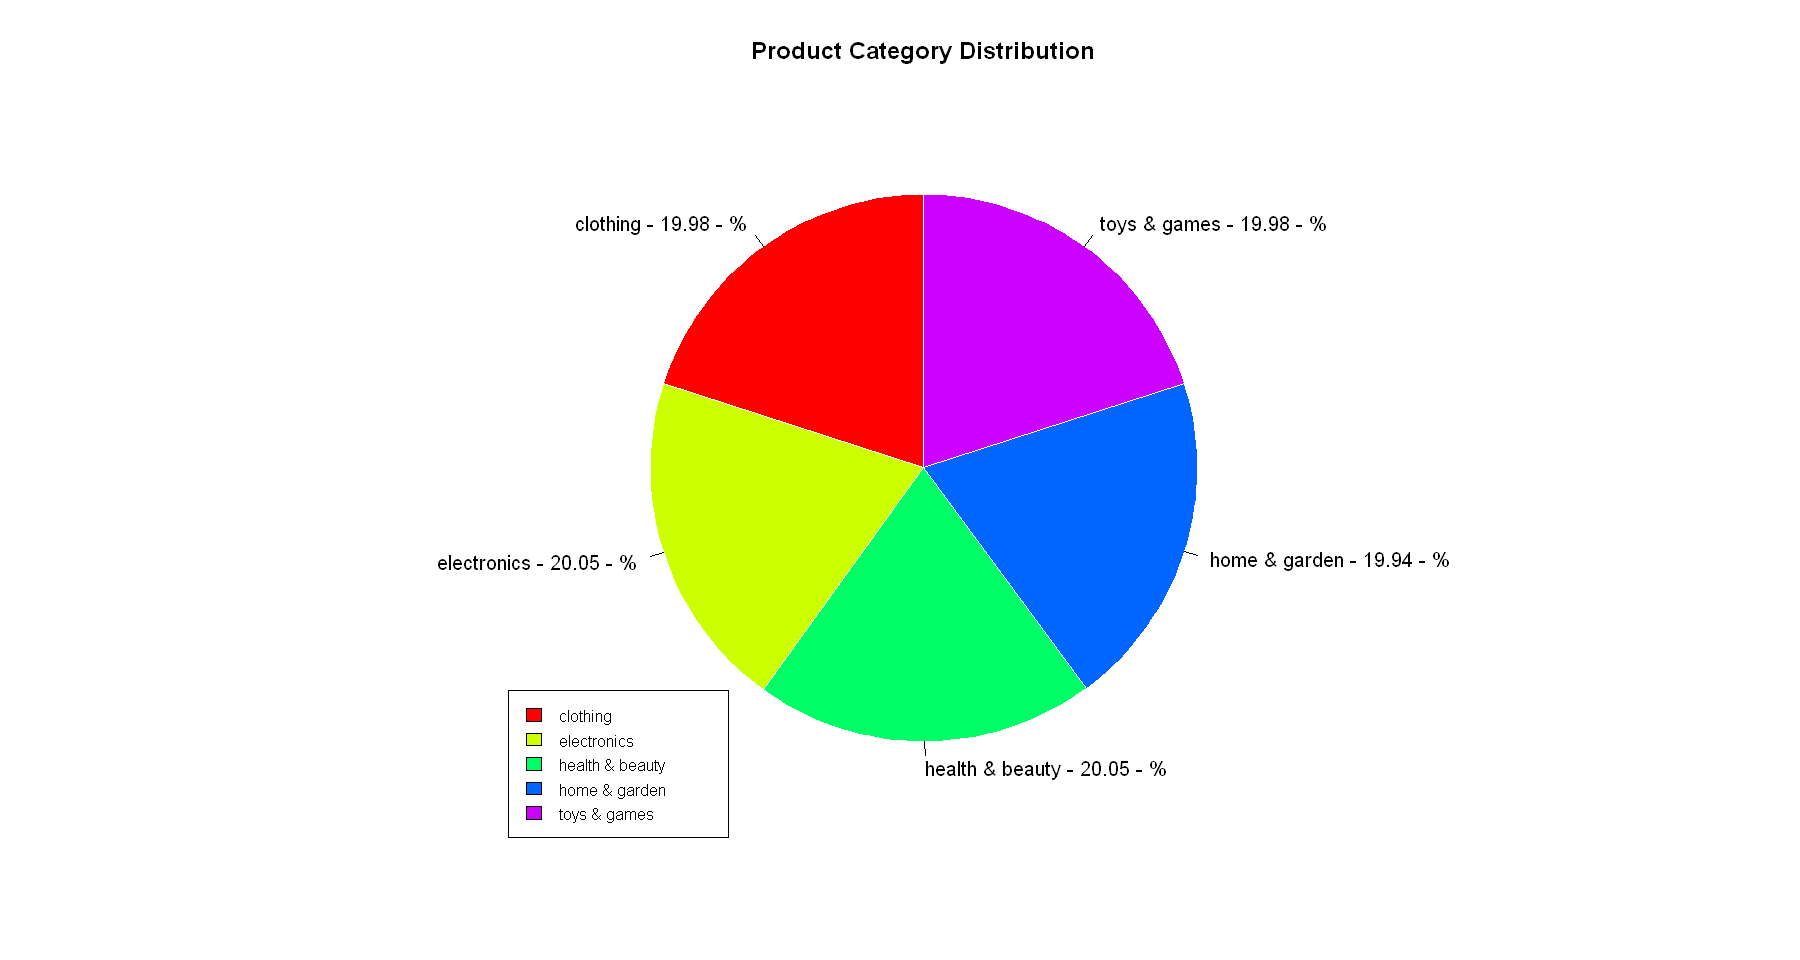

In [25]:

# Visualize the distribution of Product Categories using a donut pie chart
product_counts <- table(fraud1$Product.Category)
product_labels <- names(product_counts)
product_percentages <- round((product_counts / sum(product_counts)) * 100, 2)
product_labels_with_percentages <- paste(product_labels, product_percentages, "%", sep = " - ")

# Create a donut pie chart
pie(product_counts, labels = product_labels_with_percentages, main = "Product Category Distribution", col = rainbow(length(product_counts)), init.angle = 90, border = "white", radius = 0.8)
legend("bottomleft", product_labels, fill = rainbow(length(product_counts)), cex = 0.8)


<div style="color: #9955BB; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
    The donut pie chart visualizes the distribution of product categories in the dataset. Each slice of the pie represents a product category, and the size of each slice corresponds to the proportion of transactions associated with that category. The labels on the pie chart display both the product category name and its percentage contribution to the total number of transactions.
=> the percentages are equel for each product category
</div>

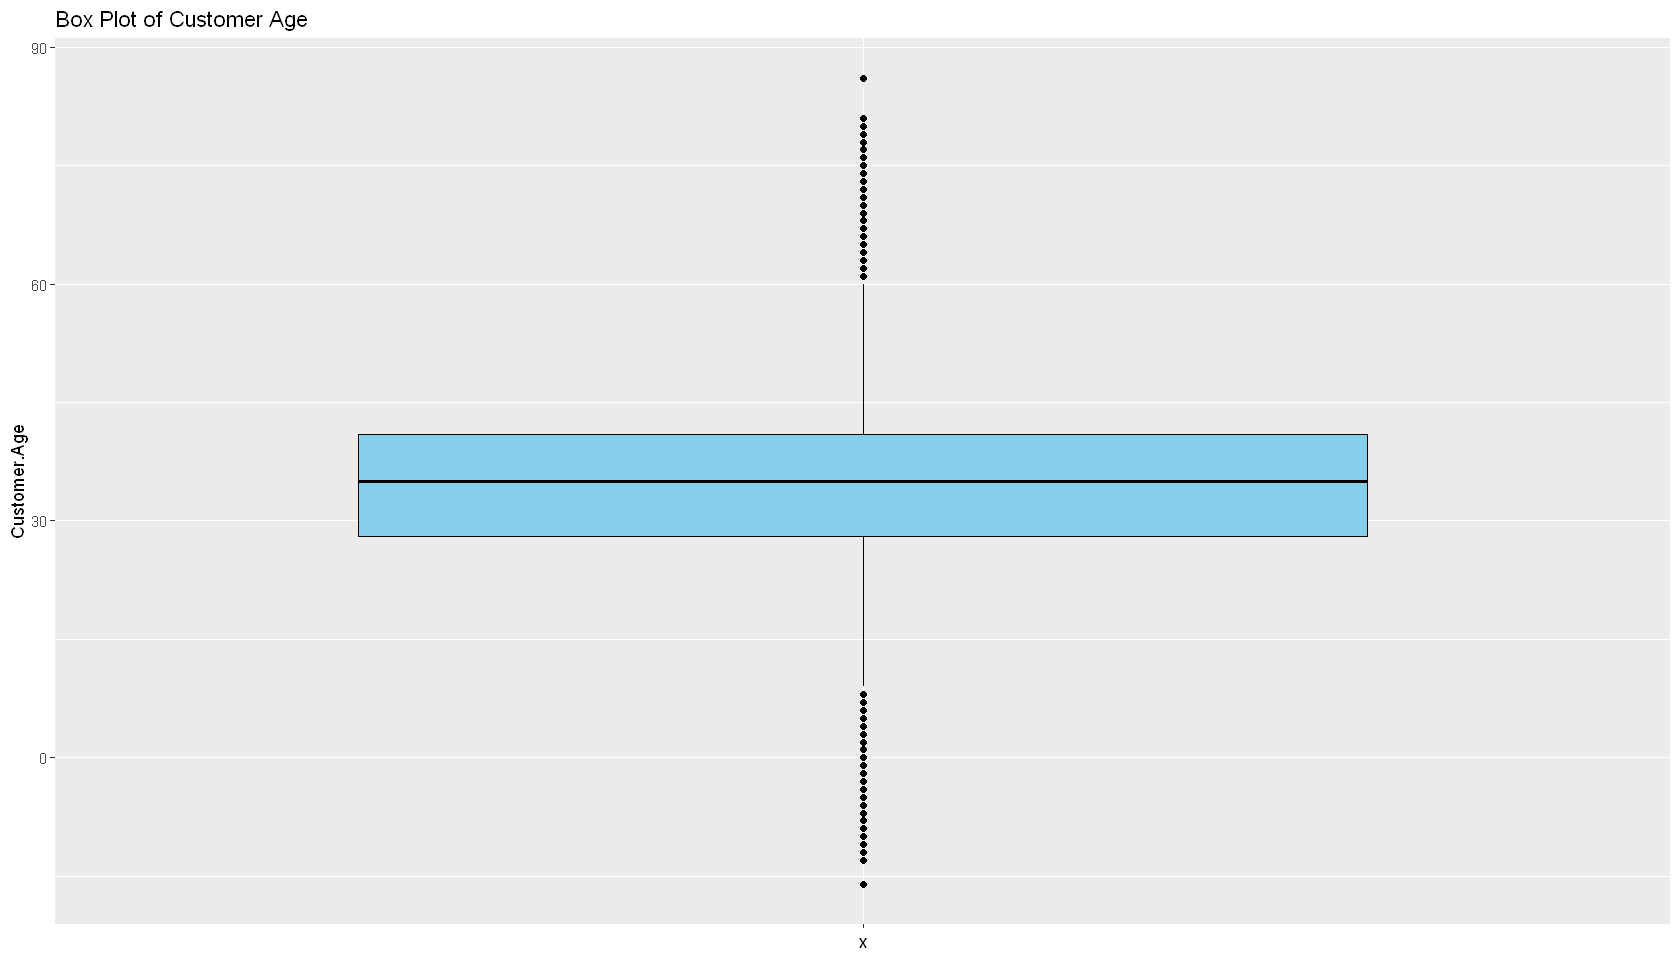

In [34]:
options(repr.plot.width = 14, repr.plot.height = 8)
ggplot(fraud1, aes(x = "", y = Customer.Age)) +
  geom_boxplot(fill = "skyblue", color = "black") +
  labs(title = "Box Plot of Customer Age") +
  theme(axis.text.x = element_blank())


<div style="color: #1034A6; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
 this plot provides a visual summary of the distribution of customer ages in the dataset : most Ages are between 25 and 35 , with outliers of customers more then 70 year old
</div>

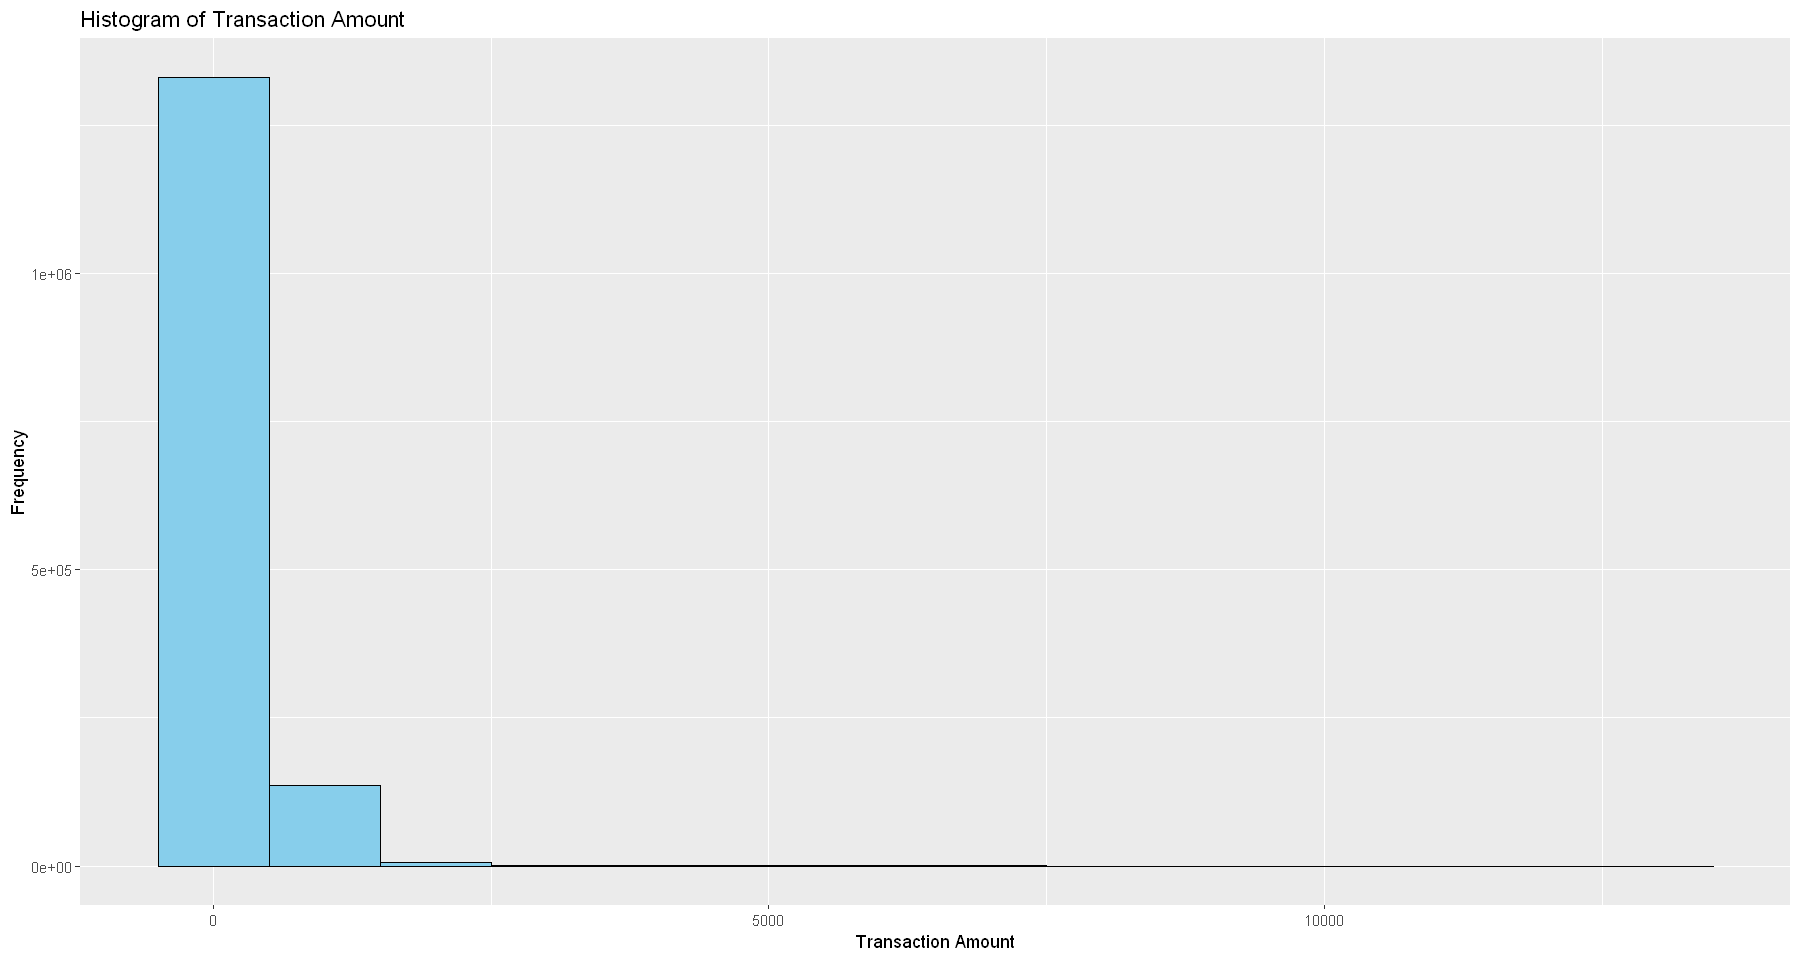

In [26]:
# Histogram of Transaction Amount
ggplot(fraud1, aes(x = Transaction.Amount)) +
  geom_histogram(binwidth = 1000 , fill = "skyblue", color = "black") +
  labs(title = "Histogram of Transaction Amount", x = "Transaction Amount", y = "Frequency")


<div style="color: #9955BB; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
    This histogram visualizes the distribution of transaction amounts in the dataset. Each bar in the histogram represents a range of transaction amounts, and the height of the bar indicates the frequency or number of transactions falling within that range
</div>

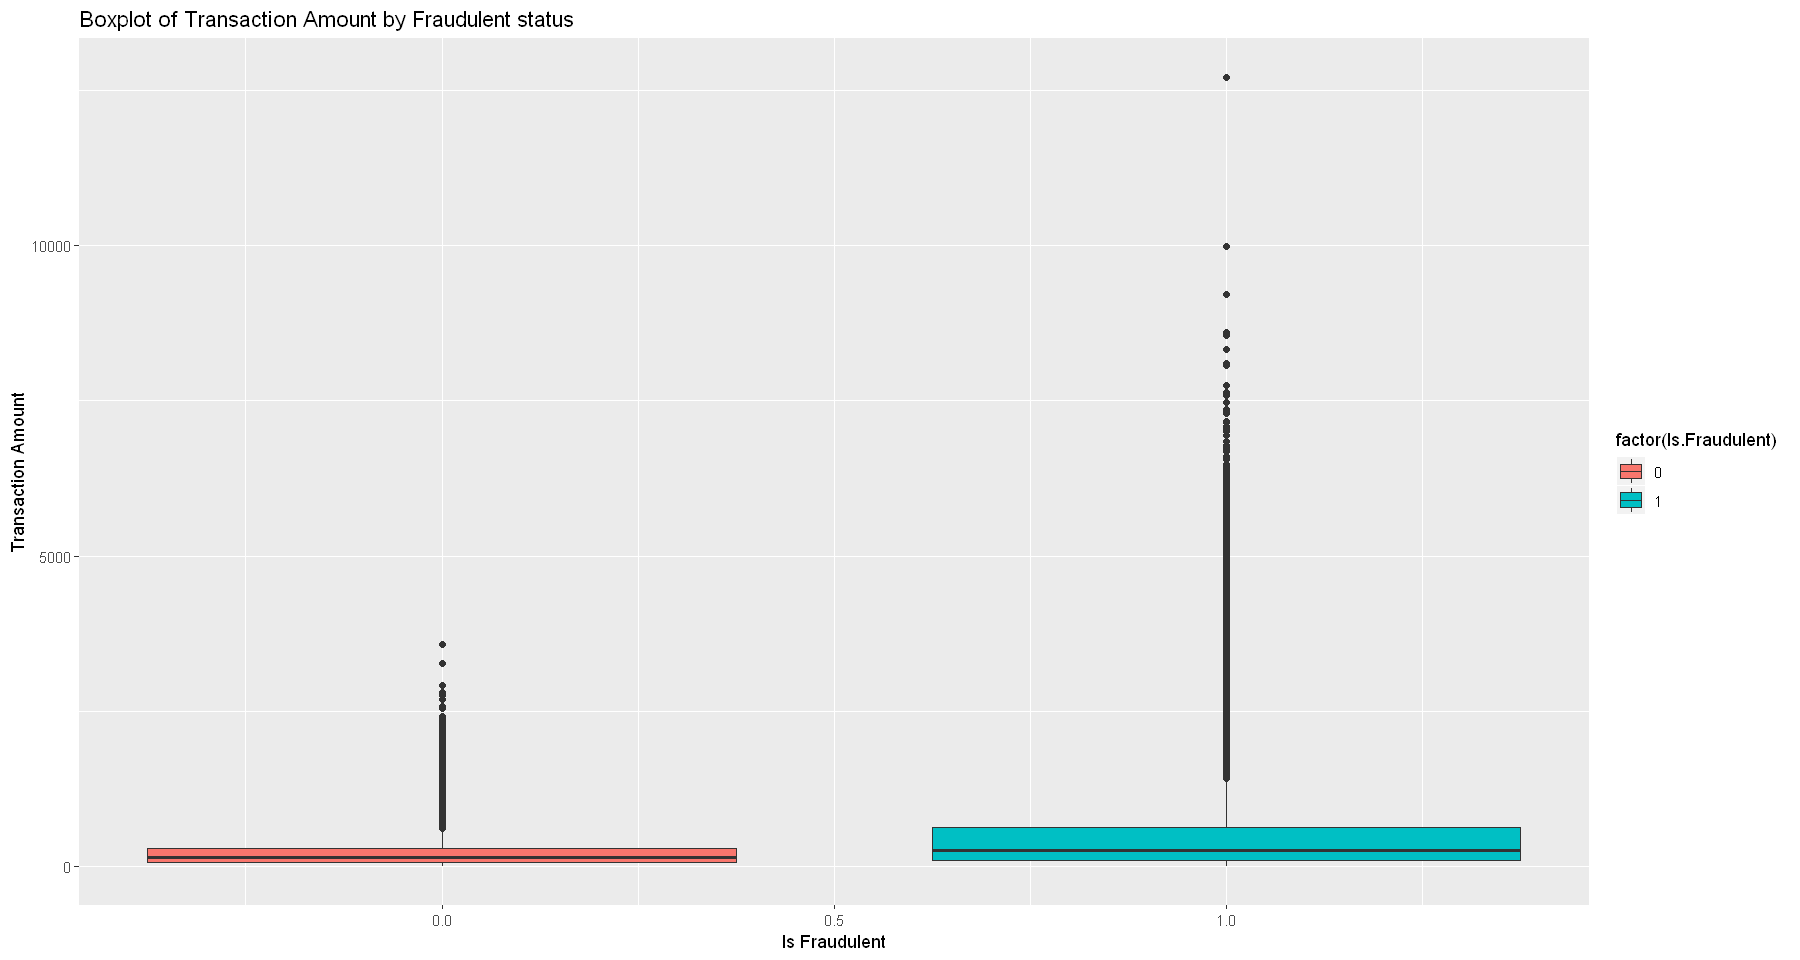

In [27]:
# Boxplot of Transaction Amount by Fraudulent status
ggplot(fraud1, aes(x = Is.Fraudulent, y = Transaction.Amount, fill = factor(Is.Fraudulent))) +
  geom_boxplot() +
  labs(title = "Boxplot of Transaction Amount by Fraudulent status", x = "Is Fraudulent", y = "Transaction Amount")


    
<div style="color: #9955BB; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
   this boxplot is used to compare the distribution of transaction amounts between fraudulent and legitimate transactions. The x-axis represents the fraudulent status (fraudulent or legitimate), while the y-axis represents the transaction amount. Each boxplot visualizes the distribution of transaction amounts for each category of fraudulent status.
</div>

In [33]:
summary(fraud1$Customer.Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -16.00   28.00   35.00   34.51   41.00   86.00 

<div style="color: #4169E1; font-size:30px; text-align:center;">Analyses Bivariés</div>

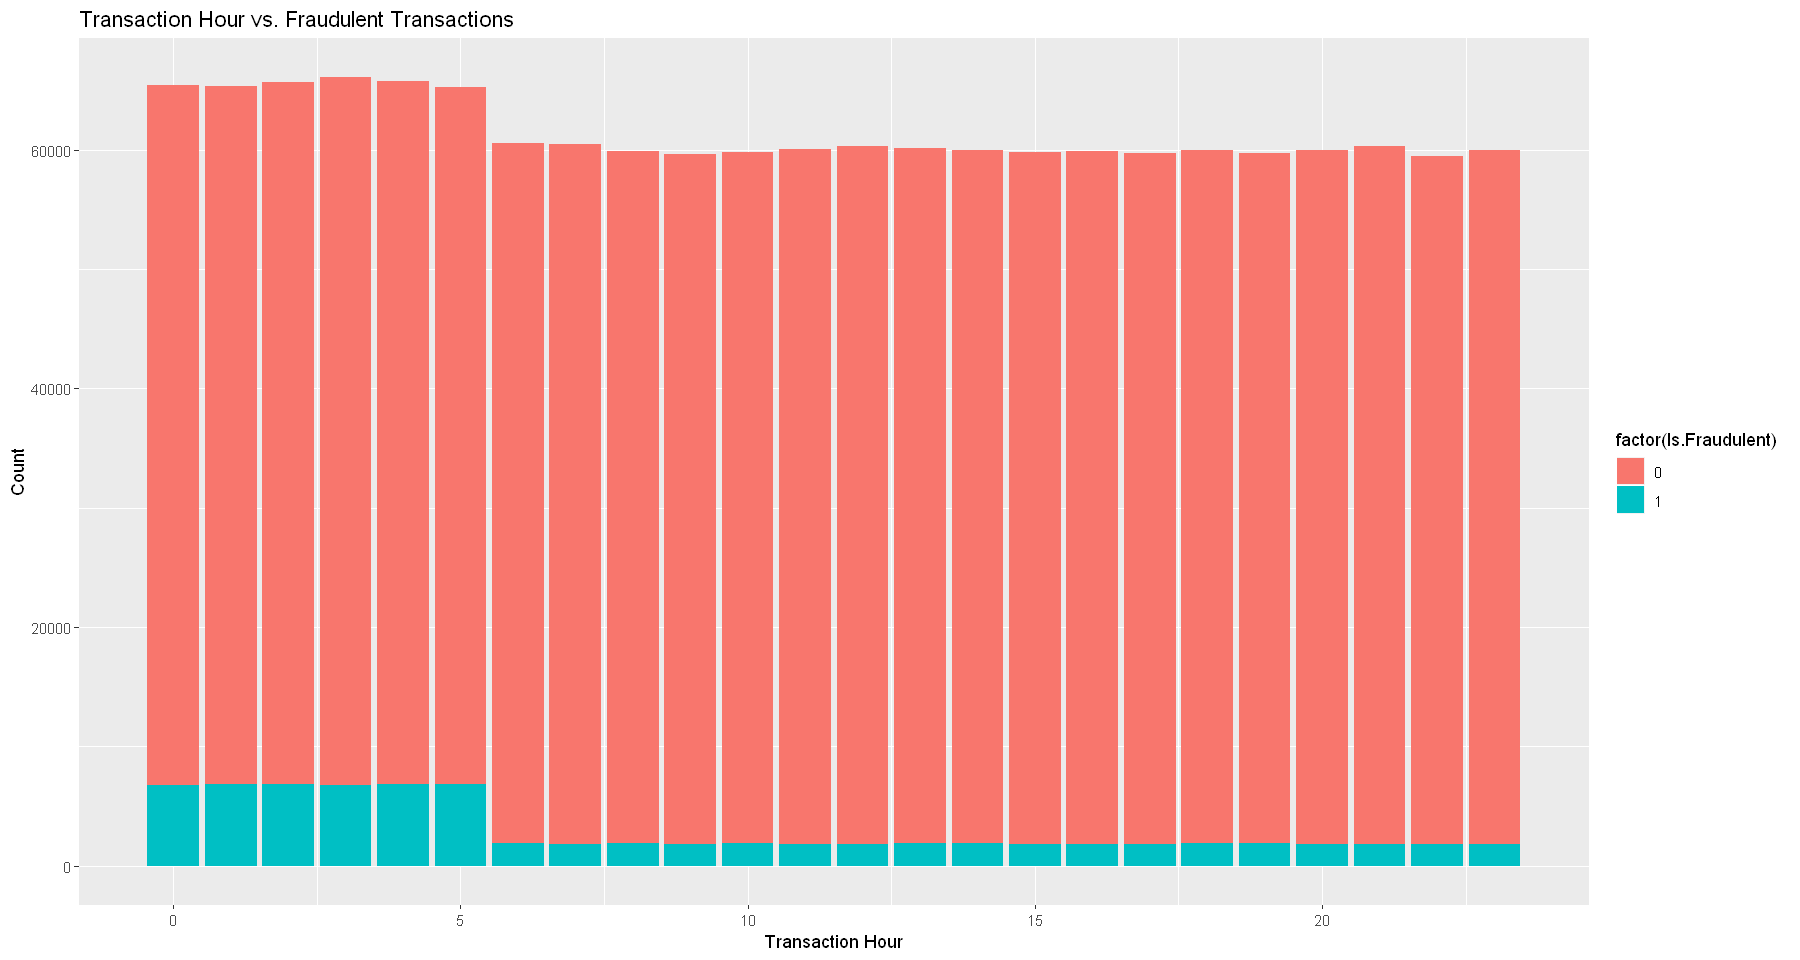

In [28]:
ggplot(fraud1, aes(x = Transaction.Hour, fill = factor(Is.Fraudulent))) +
  geom_bar() +
  labs(x = "Transaction Hour", y = "Count", title = "Transaction Hour vs. Fraudulent Transactions")

<div style="color: #9955BB; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>

This ggplot code creates a bar plot visualizing the count of fraudulent and non-fraudulent transactions across different hours of the day. The x-axis represents the transaction hour, while the y-axis shows the count of transactions. Fraudulent transactions are distinguished by fill color. The title of the plot is "Transaction Hour vs. Fraudulent Transactions". This visualization helps to understand if there's any pattern or trend in fraudulent transactions based on the time of day.
</div>

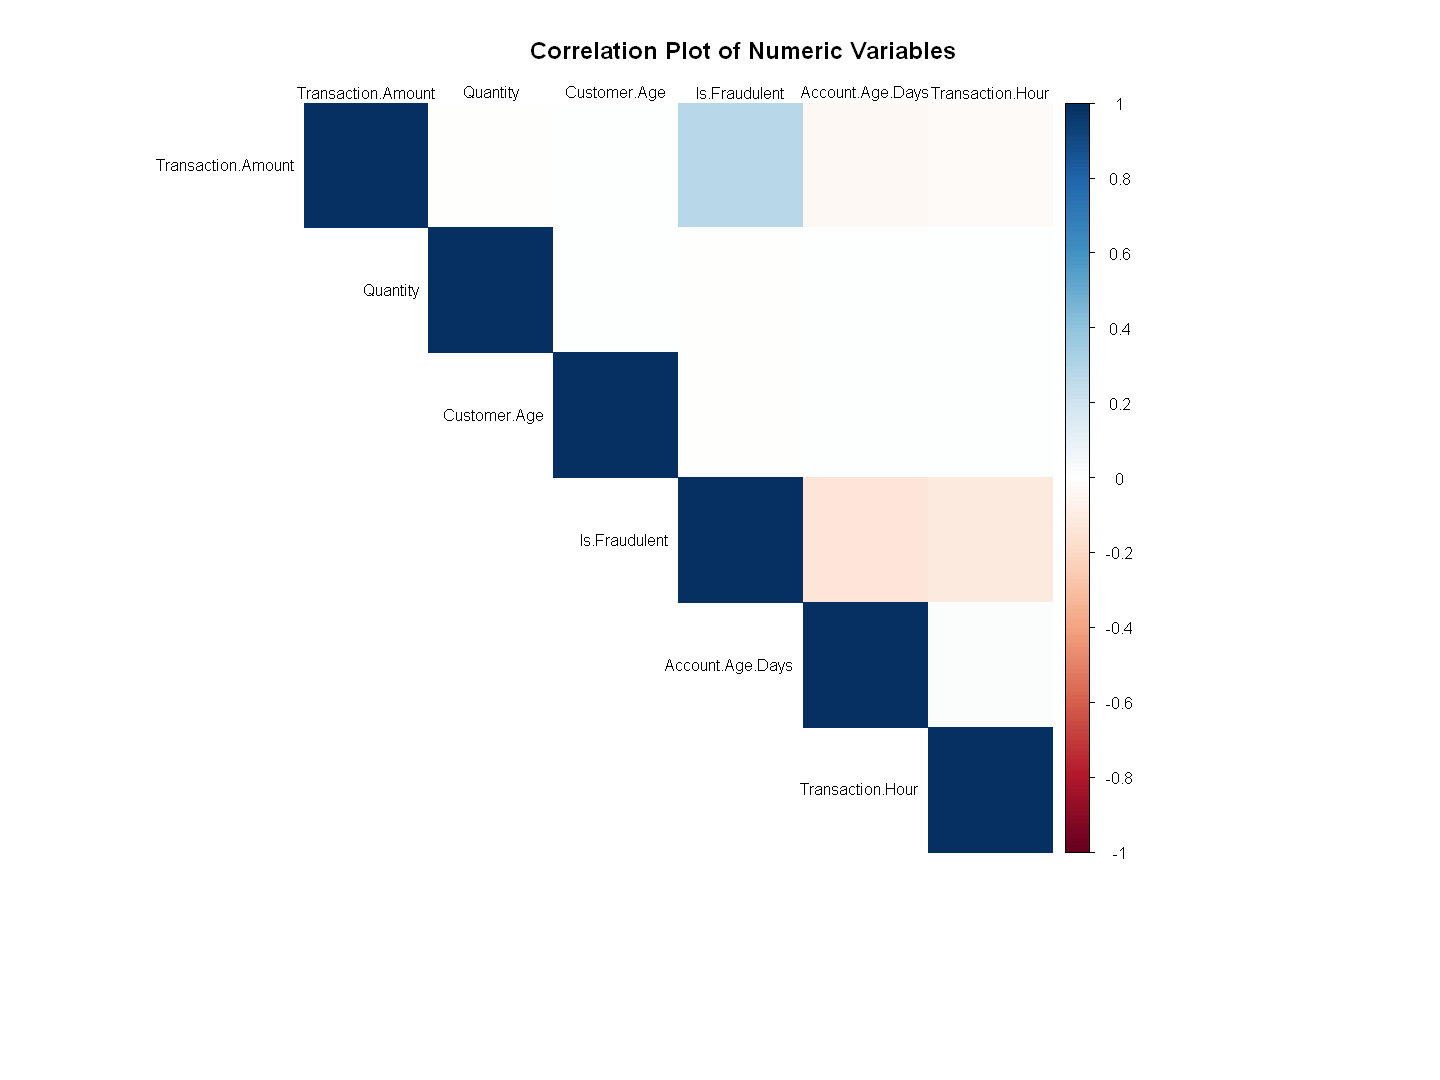

In [32]:
library(corrplot)
# Select numeric columns
numeric_columns <- sapply(fraud1, is.numeric)
numeric_data <- fraud1[, numeric_columns]

# Calculate correlations
correlation_matrix <- cor(numeric_data)
options(repr.plot.width = 12, repr.plot.height = 9)
# Visualize correlations using a correlation plot
corrplot(correlation_matrix, method = "color", type = "upper", 
         tl.cex = 0.8, tl.col = "black", tl.srt = 0, number.cex = 0.7, ,addrect = 4)
title(main = "Correlation Plot of Numeric Variables", col.main = "black", cex.main = 1.2)



<div style="color: #1034A6; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
    Correlation heatmaps visualize the correlation coefficients between different variables. These coefficients represent the strength and direction of the linear relationship between two variable: 

Positive correlation: A positive correlation coefficient (values closer to 1) indicates that as the value of one variable increases, the value of the other variable also tends to increase.
Negative correlation: A negative correlation coefficient (values closer to -1) indicates that as the value of one variable increases, the value of the other variable tends to decrease.
Zero correlation: A correlation coefficient close to zero indicates no linear relationship between the two variables.
The  darker the color (typically blue in heatmaps), the stronger the correlation (positive or negative)
    => we have a + correlation between the "Is.Fraudulent" variable and the "Transaction.Amount" varibale 
    => we have a - correlation between the "Is.Fraudulent" variable and the "Account.Age.days" varibale 
    => the rest of the variables are independant
</div>

In [29]:
#model creation
model <- glm(Is.Fraudulent ~ Transaction.Amount + Customer.Age + Account.Age.Days, data = fraud1, family = binomial)
summary(model)


Call:
glm(formula = Is.Fraudulent ~ Transaction.Amount + Customer.Age + 
    Account.Age.Days, family = binomial, data = fraud1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8120  -0.3342  -0.2477  -0.1793   3.1614  

Coefficients:
                     Estimate Std. Error  z value Pr(>|z|)    
(Intercept)        -2.729e+00  1.571e-02 -173.707   <2e-16 ***
Transaction.Amount  2.380e-03  1.125e-05  211.538   <2e-16 ***
Customer.Age       -5.445e-04  4.007e-04   -1.359    0.174    
Account.Age.Days   -6.239e-03  4.162e-05 -149.899   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 585928  on 1472951  degrees of freedom
Residual deviance: 502980  on 1472948  degrees of freedom
AIC: 502988

Number of Fisher Scoring iterations: 6


<div style="color: #9955BB; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
 we are using a logistic regression model to predict fraudulence ("Is.Fraudulent") based on three predictor variables: Transaction Amount, Customer Age, and Account Age Days. </br>
 the output of the test includes coefficients for predictor variables (Transaction Amount, Customer Age, Account Age) and their significance. Deviance residuals measure model fit, with lower values indicating better fit. The Null and Residual deviance assess goodness-of-fit, while AIC is a measure of model quality. The dispersion parameter estimates data dispersion around fitted values. Overall, the model appears to have a good fit to the data, with significant predictors.
     </div>



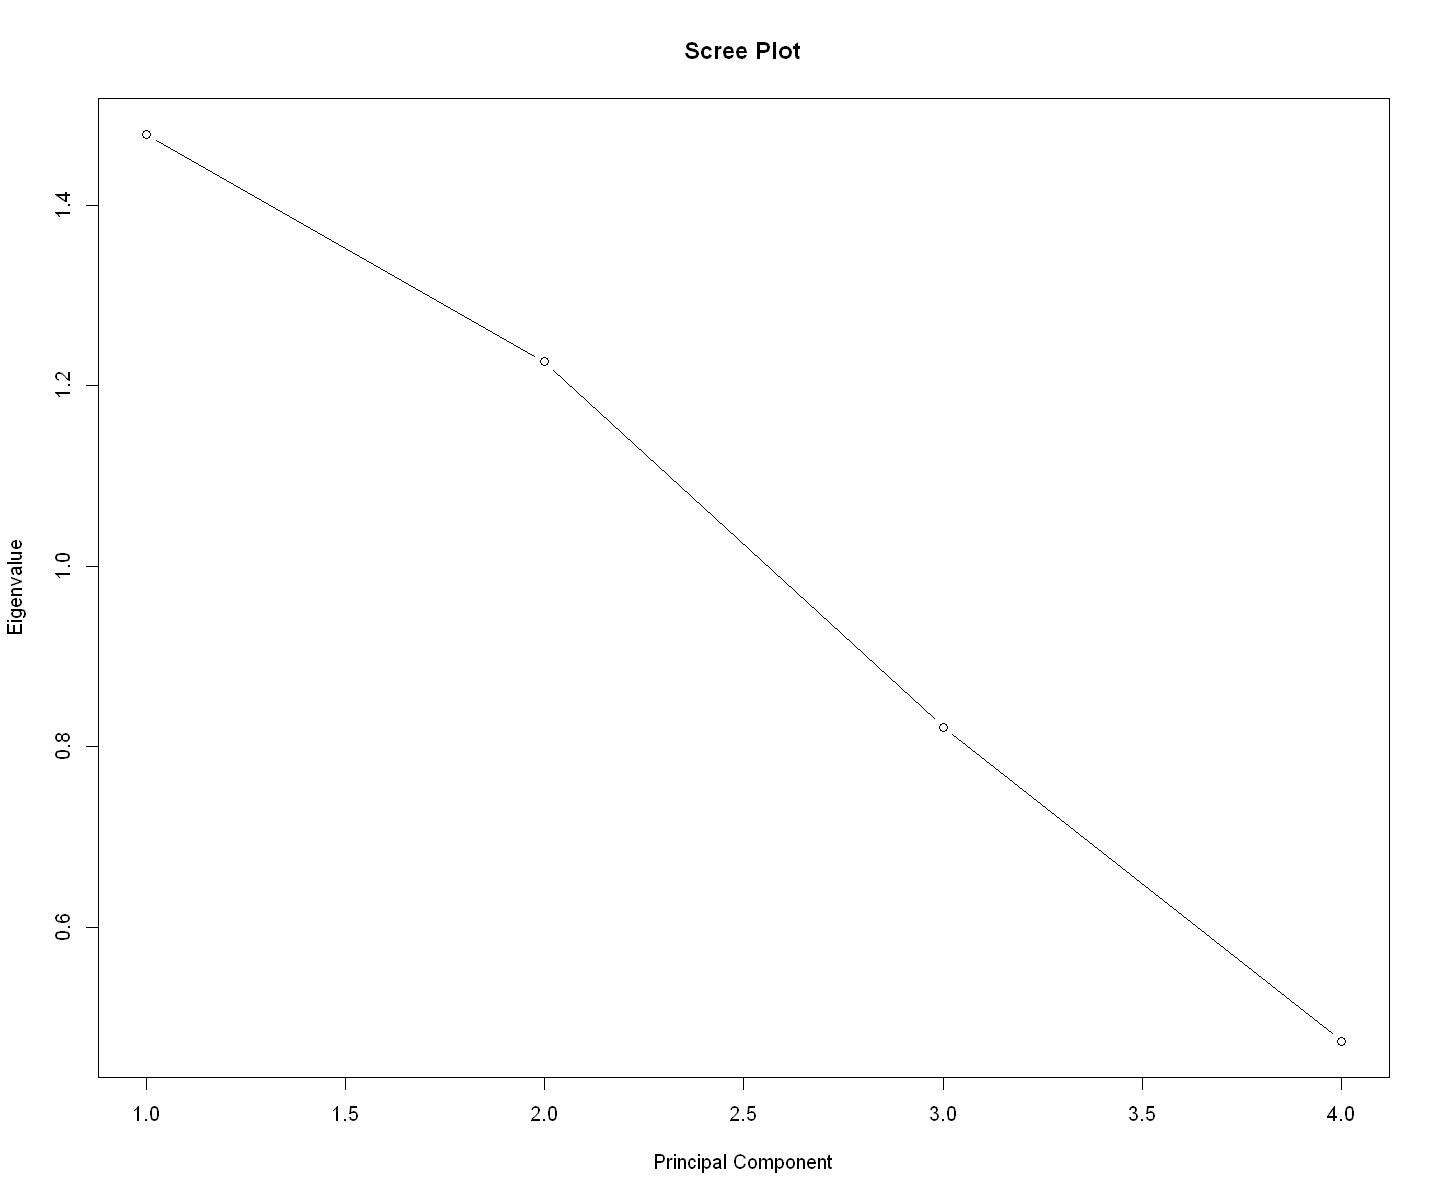

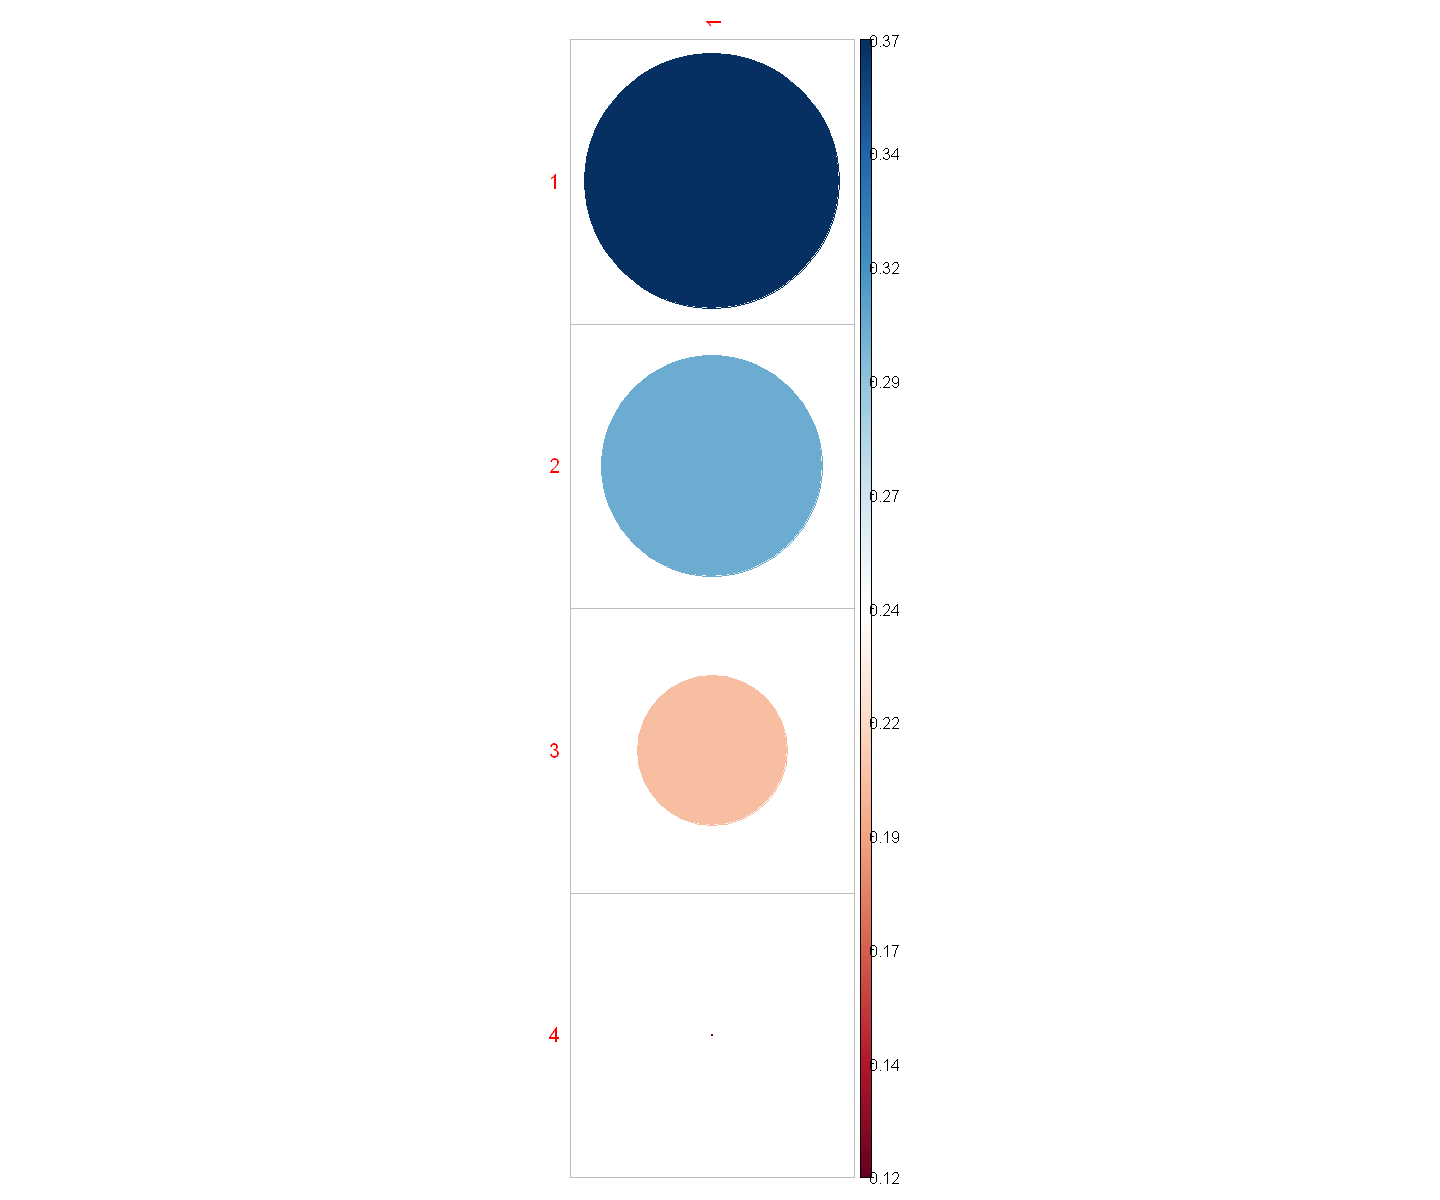

ERROR: Error in fviz_pca_var(pca_result, col.var = "cos2", gradient.cols = c("#00AFBB", : could not find function "fviz_pca_var"


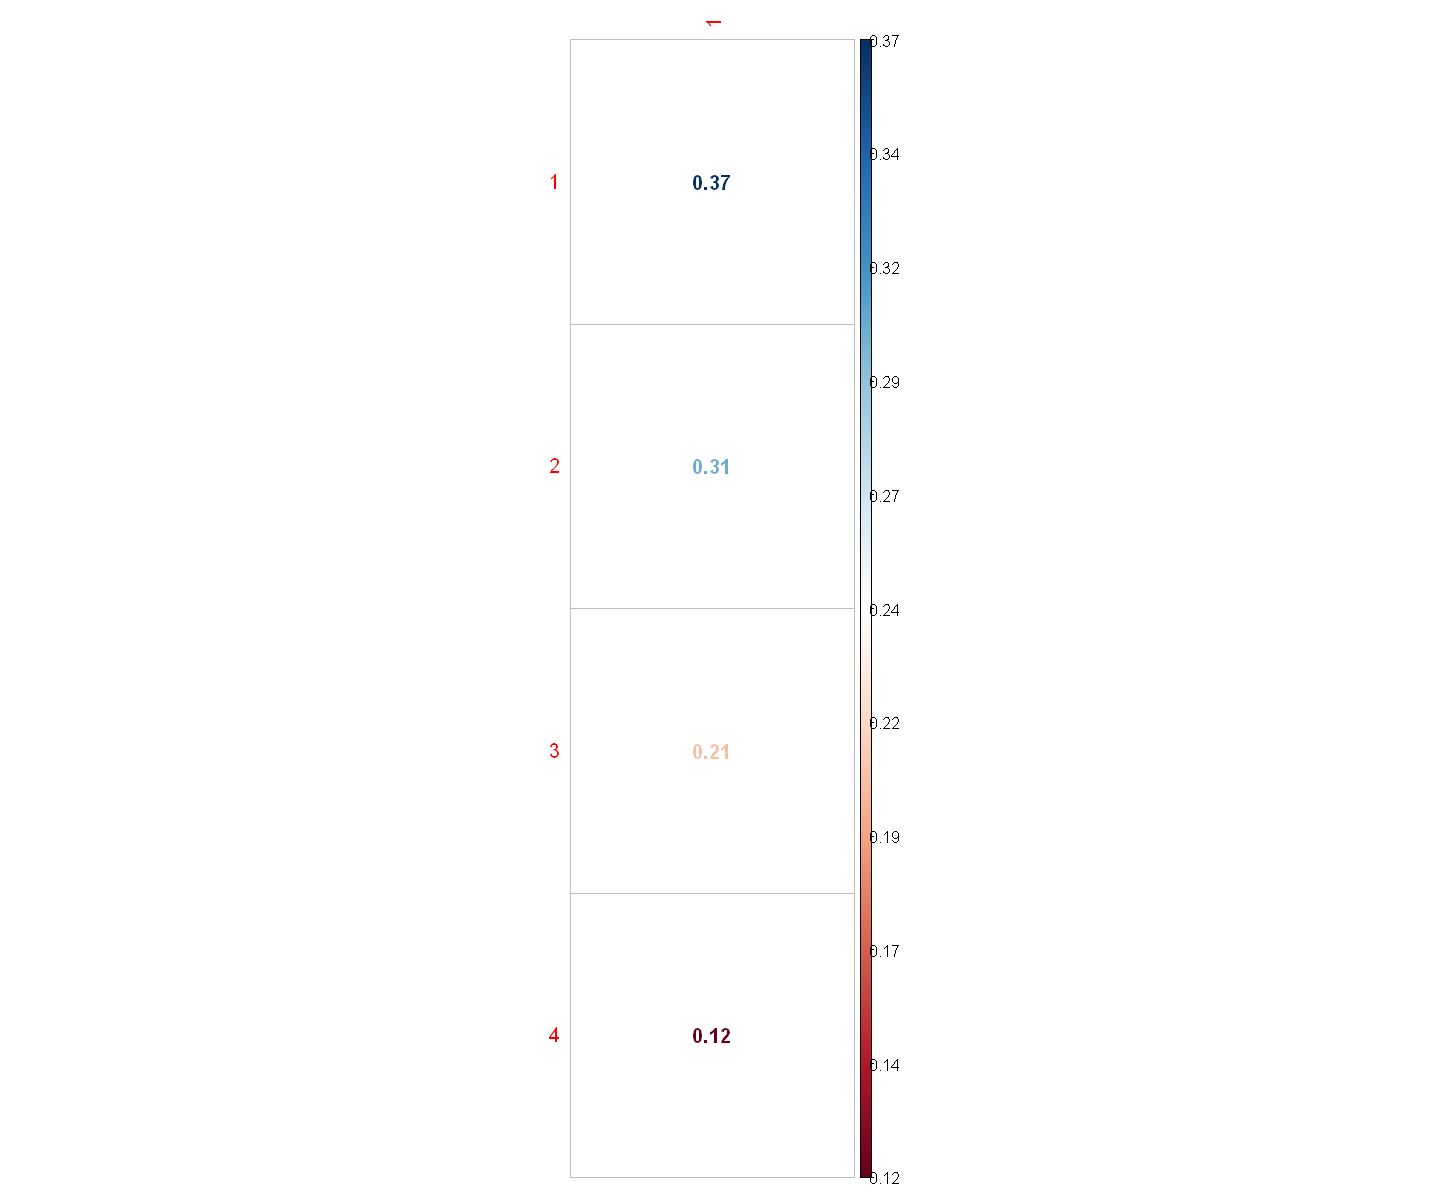

In [62]:
#method without using the "FactoMineR" library
# Select relevant columns for PCA analysis
selected_columns <- c("Transaction.Amount", "Customer.Age", "Account.Age.Days", "Transaction.Hour")

# Subset data
subset_data <- fraud1[fraud1$Customer.Location == "South Micheal", selected_columns]

# Scale the data
scaled_data <- scale(subset_data)

# Perform PCA analysis
pca_result <- prcomp(scaled_data)

# Extract eigenvalues
eigenvalues <- pca_result$sdev^2

# Visualize eigenvalues
plot(1:length(eigenvalues), eigenvalues, type = "b", xlab = "Principal Component", ylab = "Eigenvalue", main = "Scree Plot")

# Plot correlation circle
var.cos2 <- colSums(pca_result$x^2) / sum(colSums(pca_result$x^2))
corrplot(matrix(var.cos2), is.corr = FALSE)

# Display correlation values
corrplot(matrix(var.cos2), is.corr = FALSE, method = "number")

# Visualize PCA variables
fviz_pca_var(pca_result, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)



<div style="color: #1034A6; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
 performs Principal Component Analysis (PCA) on a subset of data from the fraud1 dataset, focusing on the columns related to Transaction.Amount, Customer.Age, Account.Age.Days, and Transaction.Hour, helps us understand how the selected variables contribute to the overall variance in the data and how they are related to each other in the PCA space.
</div>

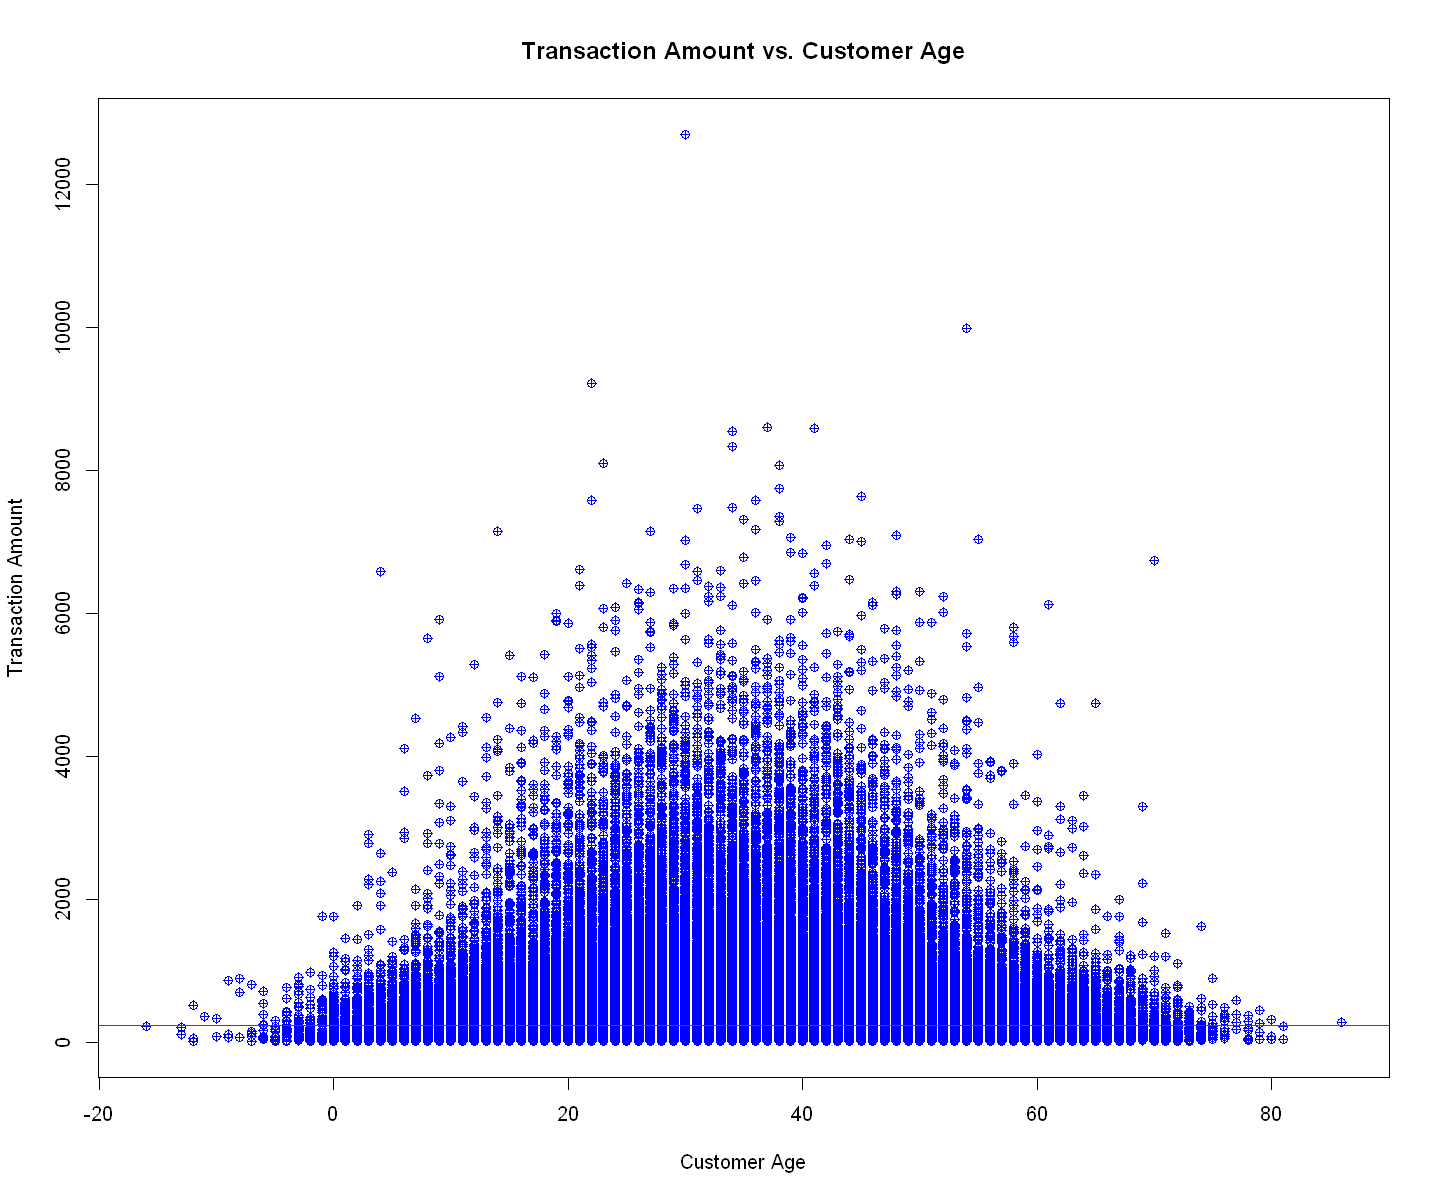

In [39]:
# Scatter plot
plot(fraud1$Customer.Age, fraud1$Transaction.Amount,
     xlab = "Customer Age", ylab = "Transaction Amount", main = "Transaction Amount vs. Customer Age", col="blue", pch=10)
abline(reg, col = "deepskyblue4")

<div style="color: #1034A6; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
   this is a scatter plot with the x-axis representing customer age and the y-axis representing transaction amount. Each point in the plot represents a data point where the coordinates correspond to the age of the customer and the amount of the transaction
</div>



Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



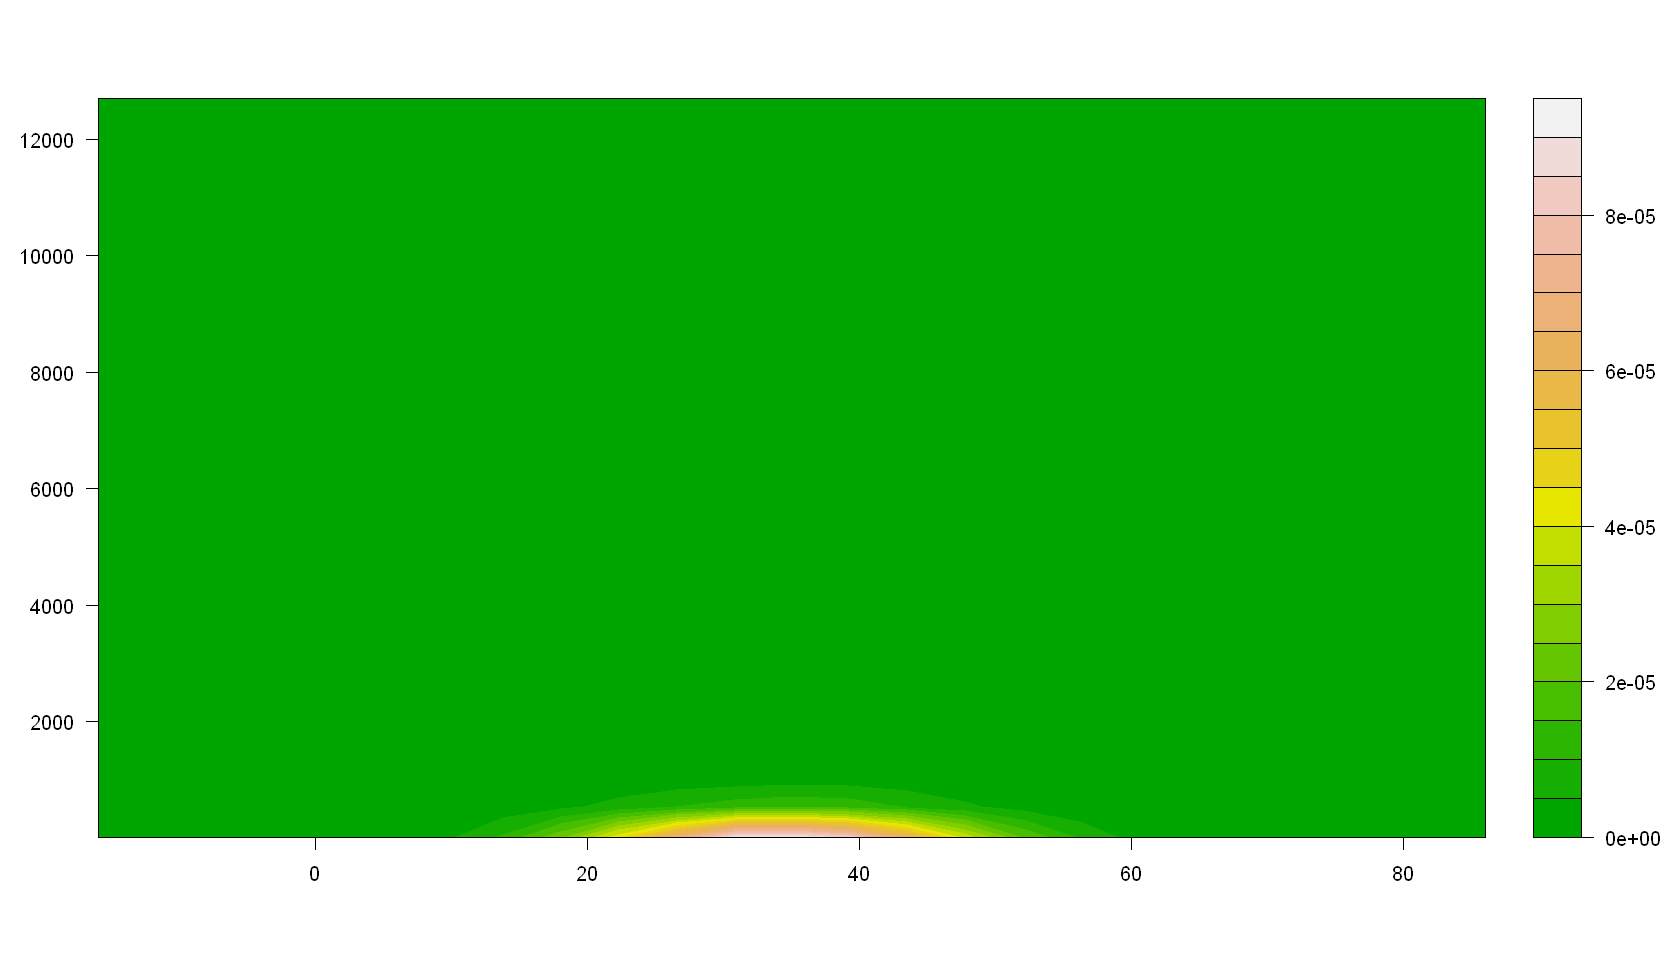

In [36]:
library(MASS)
kd = fraud1[, c("Customer.Age", "Transaction.Amount")]
kd = kd[complete.cases(kd), ]
filled.contour(kde2d(fraud1$Customer.Age, fraud1$Transaction.Amount), color = terrain.colors)

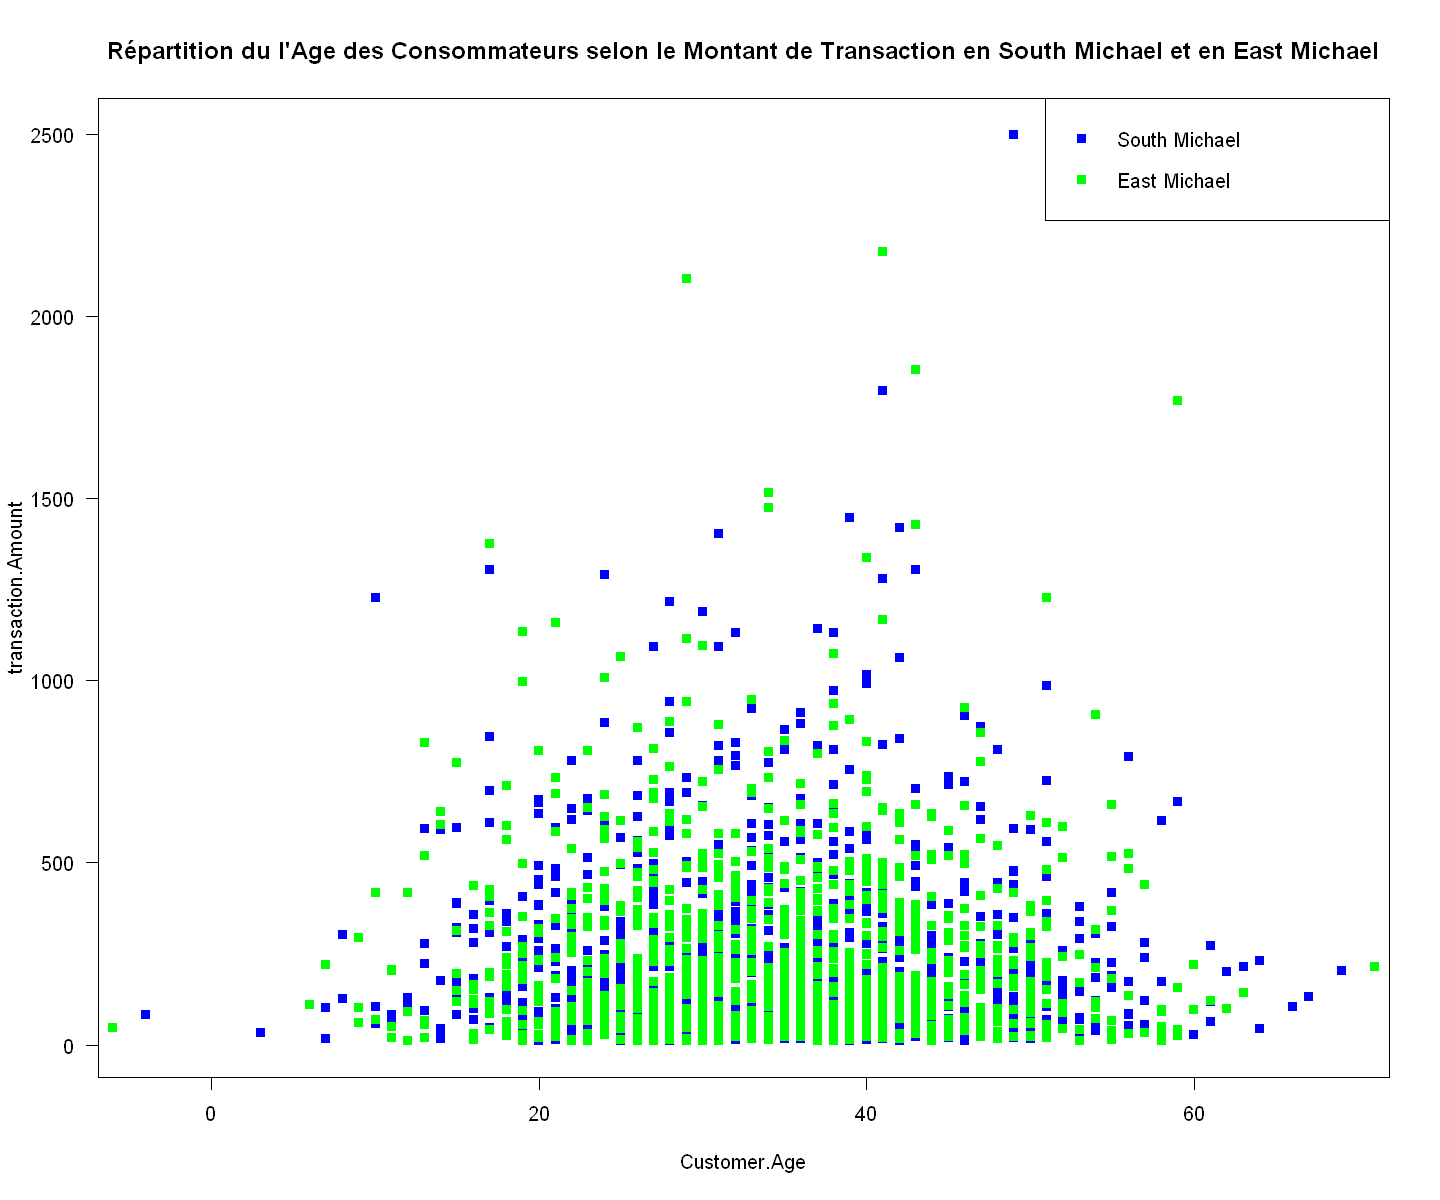

In [37]:
options(repr.plot.width = 12, repr.plot.height = 10)
plot( x = fraud1$Customer.Age[fraud1$Customer.Location=="South Michael"], y = fraud1$Transaction.Amount[fraud1$Customer.Location=="South Michael"], pch=15, col="blue",
    main="Répartition du l'Age des Consommateurs selon le Montant de Transaction en South Michael et en East Michael", xlab="Customer.Age",
ylab="transaction.Amount", las=1)
points( x = fraud1$Customer.Age[fraud1$Customer.Location=="East Michael"], y = fraud1$Transaction.Amount[fraud1$Customer.Location=="East Michael"], pch=15, col="green")
legend (x="topright", legend=c("South Michael","East Michael"),
col=c("blue","green"), pch=15)

<div style="color: #1034A6; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
    This scatter plot is showing the distribution of the customer age according to transaction amount for two different locations: "South Michael" and "East Michael". 
</div>

In [38]:
# Correlation coefficient
cor(fraud1$Customer.Age, fraud1$Transaction.Amount)

# Linear regression
reg <- lm(Transaction.Amount ~ Customer.Age, data = fraud1)
summary(reg)

[1] 0.000292479


Call:
lm(formula = Transaction.Amount ~ Customer.Age, data = fraud1)

Residuals:
    Min      1Q  Median      3Q     Max 
 -217.0  -158.2   -75.0    69.3 12475.0 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.265e+02  8.003e-01 283.011   <2e-16 ***
Customer.Age 7.906e-03  2.227e-02   0.355    0.723    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 270.4 on 1472950 degrees of freedom
Multiple R-squared:  8.554e-08,	Adjusted R-squared:  -5.934e-07 
F-statistic: 0.126 on 1 and 1472950 DF,  p-value: 0.7226


<div style="color: #1034A6; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
this linear regression model examines the relationship between 'Customer Age' and 'Transaction Amount' in the 'fraud1' dataset. The coefficient for 'Customer Age' is 7.906e-03, suggesting a very small positive effect on 'Transaction Amount', but it's not statistically significant (p-value = 0.722). The model doesn't explain much variance in 'Transaction Amount' (R-squared = 8.554e-08), indicating that 'Customer Age' may not be a strong predictor of transaction amount
</div>

In [40]:
#pour la population mère, une estimation du Montant de Transaction moyen et un intervalle de confiance pour cette moyenne de niveau 95 %:
t.test(fraud1$Transaction.Amount)


	One Sample t-test

data:  fraud1$Transaction.Amount
t = 1017.8, df = 1472951, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 226.3316 227.2050
sample estimates:
mean of x 
 226.7683 



<div style="color: #1034A6; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
   the results suggest that there is strong evidence to reject the null hypothesis that the mean Transaction Amount is equal to 0. Instead, we conclude that the mean Transaction Amount is significantly different from 0, with a high degree of confidence.
</div>

In [41]:
#pour la population mère, une estimation du l'Age moyen des Consommateurs et un intervalle de confiance pour cette moyenne de niveau 95 %:
t.test(fraud1$Customer.Age)


	One Sample t-test

data:  fraud1$Customer.Age
t = 4187.3, df = 1472951, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 34.49593 34.52824
sample estimates:
mean of x 
 34.51208 



<div style="color: #008A7D; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
With a very low p-value (< 2.2e-16), the null hypothesis of the mean being equal to 0 is rejected in favor of the alternative hypothesis. The 95% confidence interval provides a range within which the true mean age of customers is estimated to lie, based on the sample data. Additionally, the estimated mean age of customers is reported as 34.51208.

</div>

In [42]:
# Fit a linear regression model
lm_model <- lm(Transaction.Amount ~ Customer.Age + Quantity + Account.Age.Days, data = fraud1)
summary(lm_model)


Call:
lm(formula = Transaction.Amount ~ Customer.Age + Quantity + Account.Age.Days, 
    data = fraud1)

Residuals:
    Min      1Q  Median      3Q     Max 
 -233.0  -157.9   -74.6    69.6 12461.2 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      243.068131   1.000700 242.898   <2e-16 ***
Customer.Age       0.008446   0.022258   0.379    0.704    
Quantity          -0.116316   0.157381  -0.739    0.460    
Account.Age.Days  -0.090413   0.002084 -43.394   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 270.2 on 1472948 degrees of freedom
Multiple R-squared:  0.001277,	Adjusted R-squared:  0.001275 
F-statistic: 627.9 on 3 and 1472948 DF,  p-value: < 2.2e-16



<div style="color: #1034A6; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>fits a linear regression model to the 'fraud1' dataset, where 'Transaction Amount' is regressed on 'Customer Age', 'Quantity', and 'Account Age Days'</br>
    =>The model's overall fit, as indicated by the R-squared value, is very low, suggesting that these predictors explain only a small proportion of the variability in 'Transaction Amount'.
</div>

In [43]:
# Summary statistics for Account Age Days
summary(fraud1$Account.Age.Days)
# Summary statistics for Quantity
summary(fraud1$Quantity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    86.0   179.0   179.6   272.0   365.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       2       3       3       4       5 

[1] -0.0006516208

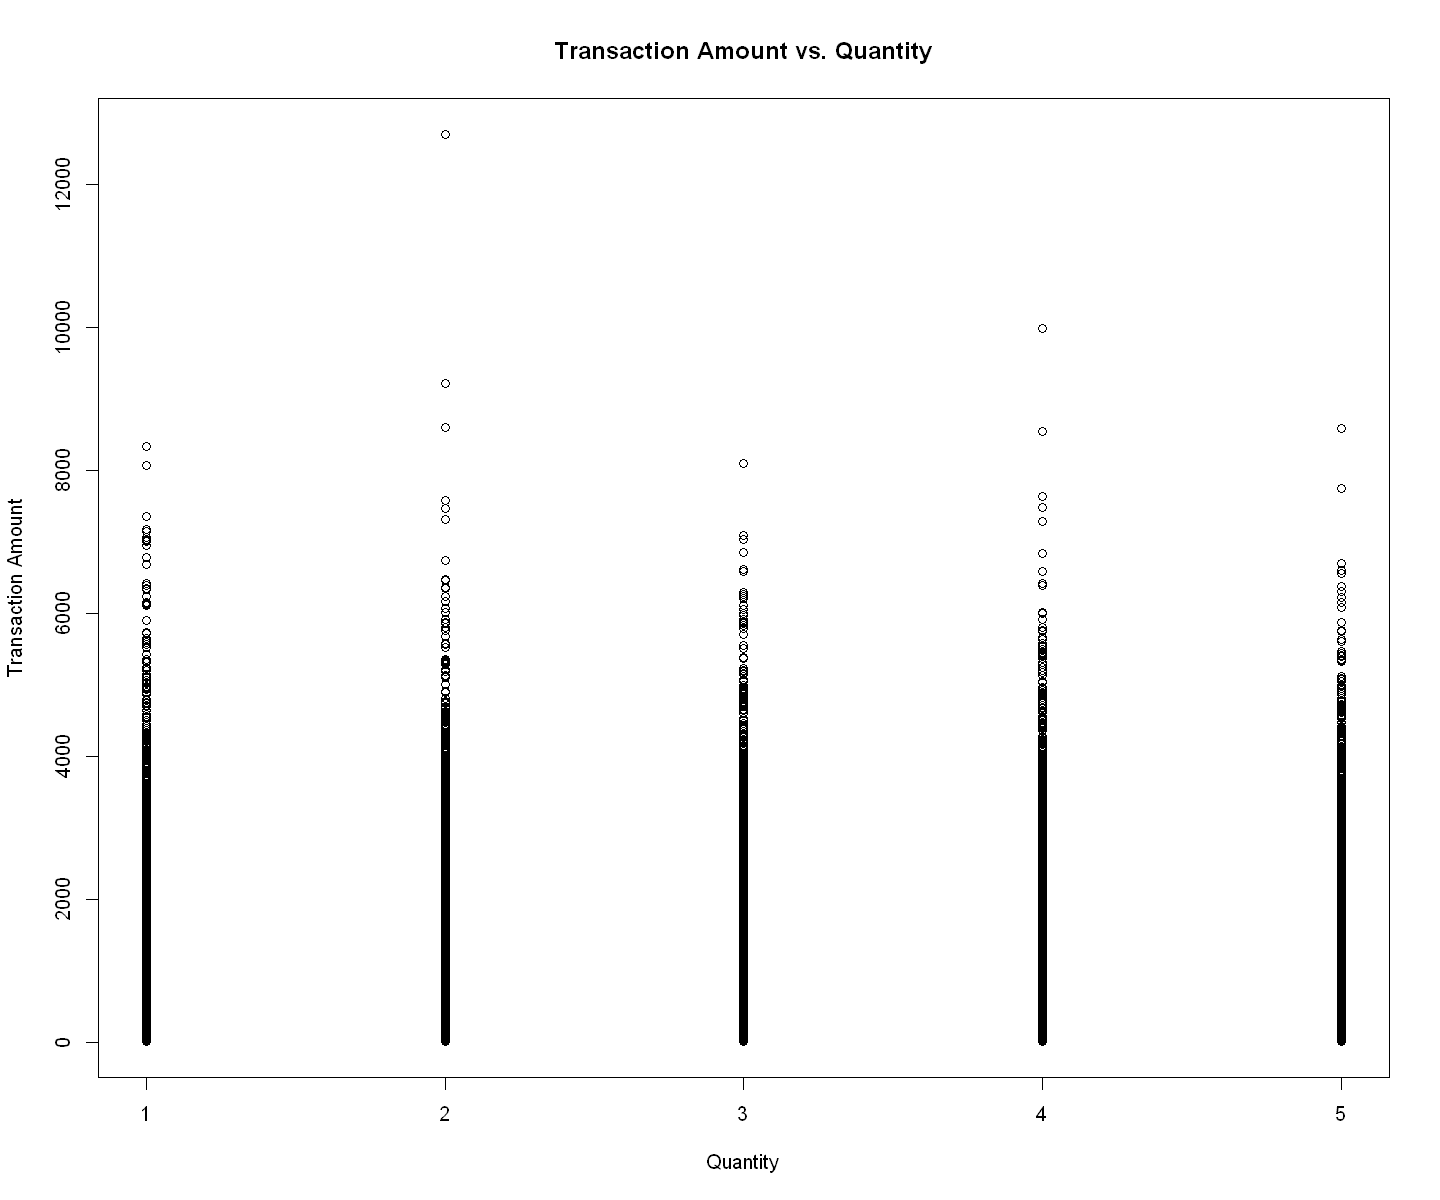

In [56]:
# Scatter plot
plot(fraud1$Quantity, fraud1$Transaction.Amount,
     xlab = "Quantity", ylab = "Transaction Amount", main = "Transaction Amount vs. Quantity")

# Correlation coefficient
cor(fraud1$Quantity, fraud1$Transaction.Amount)

<div style="color: #1034A6; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
   This scatter plot of 'Transaction Amount' against 'Quantity',is providing a visual representation of their relationship. Additionally, it calculates the correlation coefficient between these two variables, indicating the strength and direction of their linear relationship. Finally, it fits a linear regression model to predict 'Transaction Amount' based on 'Quantity
</div>

In [57]:
# Linear regression
lm_model <- lm(Transaction.Amount ~ Quantity, data = fraud1)
summary(lm_model)


Call:
lm(formula = Transaction.Amount ~ Quantity, data = fraud1)

Residuals:
    Min      1Q  Median      3Q     Max 
 -217.0  -158.2   -75.0    69.3 12474.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 227.1420     0.5224 434.826   <2e-16 ***
Quantity     -0.1245     0.1575  -0.791    0.429    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 270.4 on 1472950 degrees of freedom
Multiple R-squared:  4.246e-07,	Adjusted R-squared:  -2.543e-07 
F-statistic: 0.6254 on 1 and 1472950 DF,  p-value: 0.429


<div style="color: #1034A6; font-size: 16px; text-align: center;">
    <h2>Test Khi-2:</h2>
</div>

In [76]:
# Create a contingency table
contingency_table <- table(fraud1$Is.Fraudulent, fraud1$Customer.Age)

# Print the contingency table
print(contingency_table)

# Perform chi-square test
chi_square_result <- chisq.test(contingency_table)

# Print the chi-square test result
print(chi_square_result)


   
      -16   -13   -12   -11   -10    -9    -8    -7    -6    -5    -4    -3
  0     1     2     2     1     2     3     3     5    13    12    29    52
  1     0     0     1     0     0     0     1     0     0     0     0     1
   
       -2    -1     0     1     2     3     4     5     6     7     8     9
  0    58    63   251   211   271   443   530   688   962  1248  1699  2143
  1     4     5    12     7    13    27    24    33    48    78    76   108
   
       10    11    12    13    14    15    16    17    18    19    20    21
  0  2722  3493  4468  5513  6866  8357 10027 11983 14197 16881 19331 22249
  1   149   186   255   315   353   447   556   652   778   854   984  1224
   
       22    23    24    25    26    27    28    29    30    31    32    33
  0 25595 28686 31888 35555 39011 42069 45348 48130 50335 52517 54136 55160
  1  1346  1543  1724  1833  2109  2273  2391  2505  2700  2697  2828  2901
   
       34    35    36    37    38    39    40    41    42    43    4

Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  contingency_table
X-squared = 70.832, df = 96, p-value = 0.9747




<div style="color: #1034A6; font-size: 16px; text-align: left;">
  => to generate a contingency table showing the frequency of each combination of levels of the two variables, and then perform a chi-square test of independence on that contingency table</br>
     =>the result suggests that there is no statistically significant association between the variables in the contingency table. The p-value of 0.9747 indicates that there is no significant difference between the observed and expected frequencies, leading to the conclusion that the variables are independent of each other.
</div>

<div style="color: #1034A6; font-size: 16px; text-align: center;">
    <h2>Test Anova:</h2>
</div>

ANOVA Summary:   Analysis of Variance Table

Response: Transaction.Amount
                    Df     Sum Sq Mean Sq F value Pr(>F)
Payment.Method       3 7.7028e+04   25676  0.3512 0.7883
Residuals      1472948 1.0769e+11   73114               


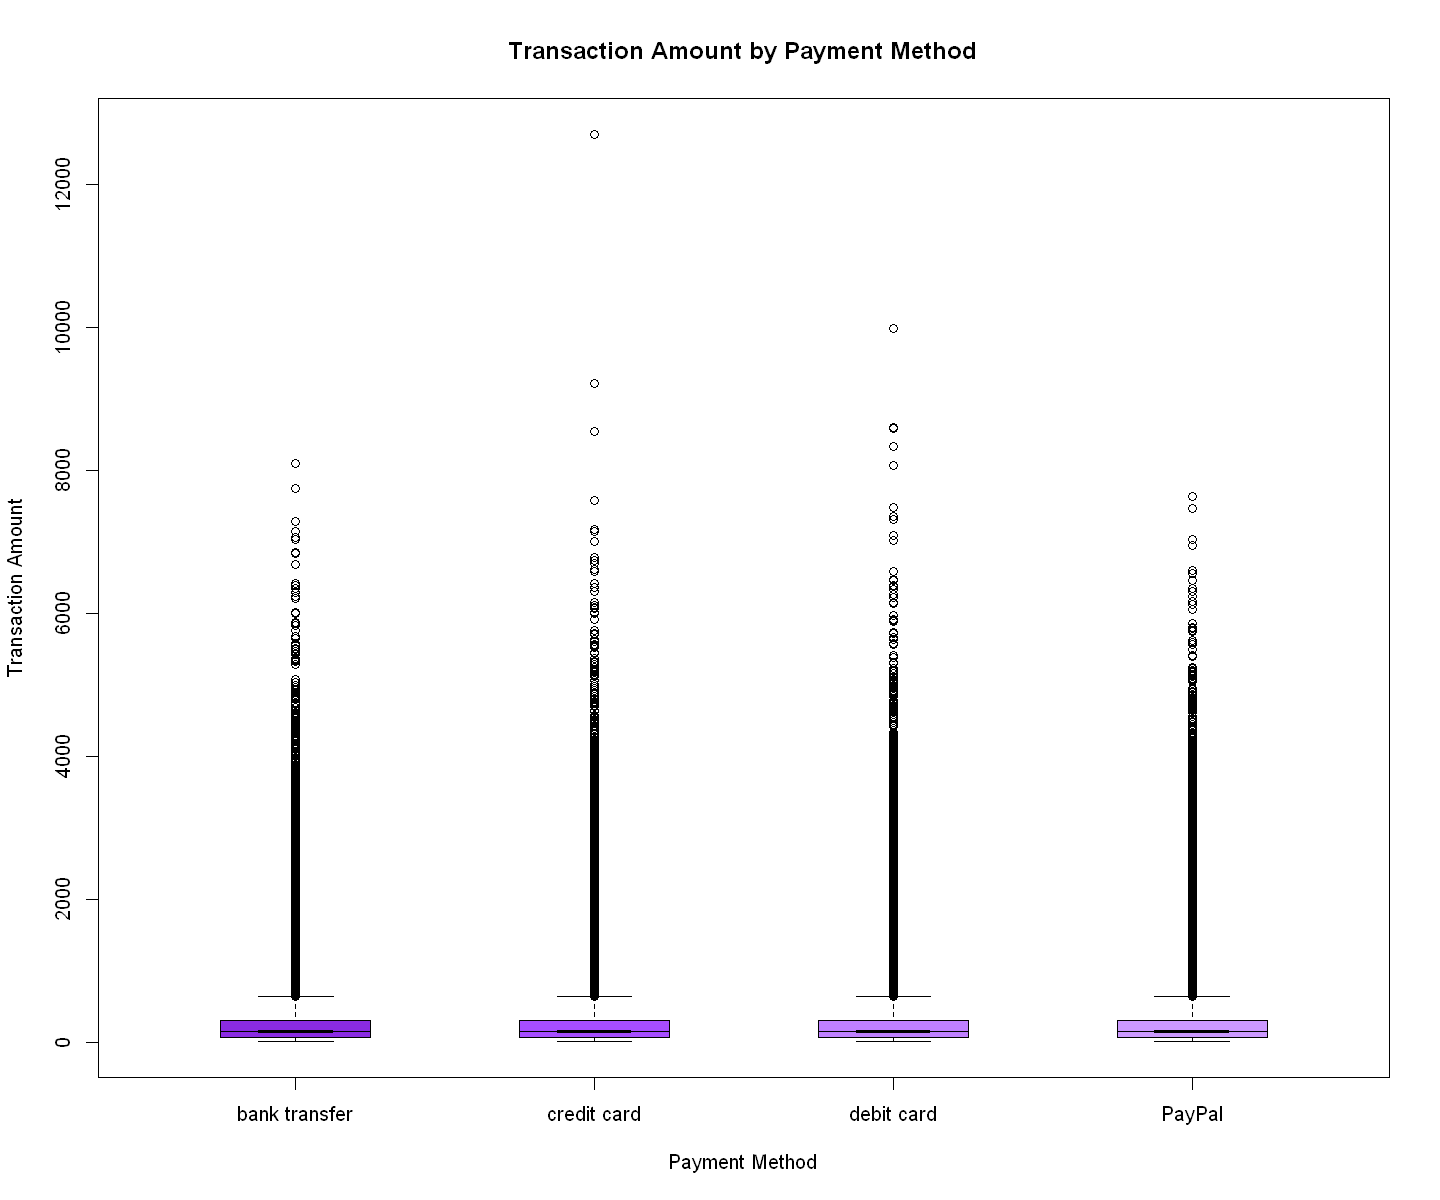

In [61]:
# Set a palette with shades of purple
purple_palette <- c("#8a2be2", "#a64dff", "#bf80ff", "#cc99ff", "#d9b3ff")

# Box plot with custom styling
boxplot(Transaction.Amount ~ Payment.Method, data = fraud1,
        xlab = "Payment Method", ylab = "Transaction Amount", main = "Transaction Amount by Payment Method",
        col = purple_palette, border = "black", notch = TRUE, notchwidth = 0.5,
        boxwex = 0.5, whisklty = 2, whisklwd = 1, staplelwd = 1)

# ANOVA test
lm_model <- lm(Transaction.Amount ~ Payment.Method, data = fraud1)
anova_result <- anova(lm_model)

# Print ANOVA summary with customized formatting
cat("ANOVA Summary:   ")
print(anova_result)


<div style="color: #1034A6; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
The ANOVA table summarizes the results of the analysis of variance, which tests for differences in the mean transaction amounts across different payment methods.
The table consists of two main components: the between-groups variation (associated with the payment method) and the within-groups variation (residuals).
The degrees of freedom represent the number of independent observations available for estimating statistical parameters.</br>
=>the high p-value (0.7883) suggests that there is no significant difference in Transaction.Amount across different payment methods.
</div>

<div style="color: #1034A6; font-size: 16px; text-align: center;">
    <h2>PCA:</h2>
</div>

In [ ]:
predictions <- predict(model, newdata = fraud2, type = "response")


Call:
glm(formula = Is.Fraudulent ~ Transaction.Amount + Customer.Age + 
    Account.Age.Days, family = binomial, data = fraud1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8120  -0.3342  -0.2477  -0.1793   3.1614  

Coefficients:
                     Estimate Std. Error  z value Pr(>|z|)    
(Intercept)        -2.729e+00  1.571e-02 -173.707   <2e-16 ***
Transaction.Amount  2.380e-03  1.125e-05  211.538   <2e-16 ***
Customer.Age       -5.445e-04  4.007e-04   -1.359    0.174    
Account.Age.Days   -6.239e-03  4.162e-05 -149.899   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 585928  on 1472951  degrees of freedom
Residual deviance: 502980  on 1472948  degrees of freedom
AIC: 502988

Number of Fisher Scoring iterations: 6


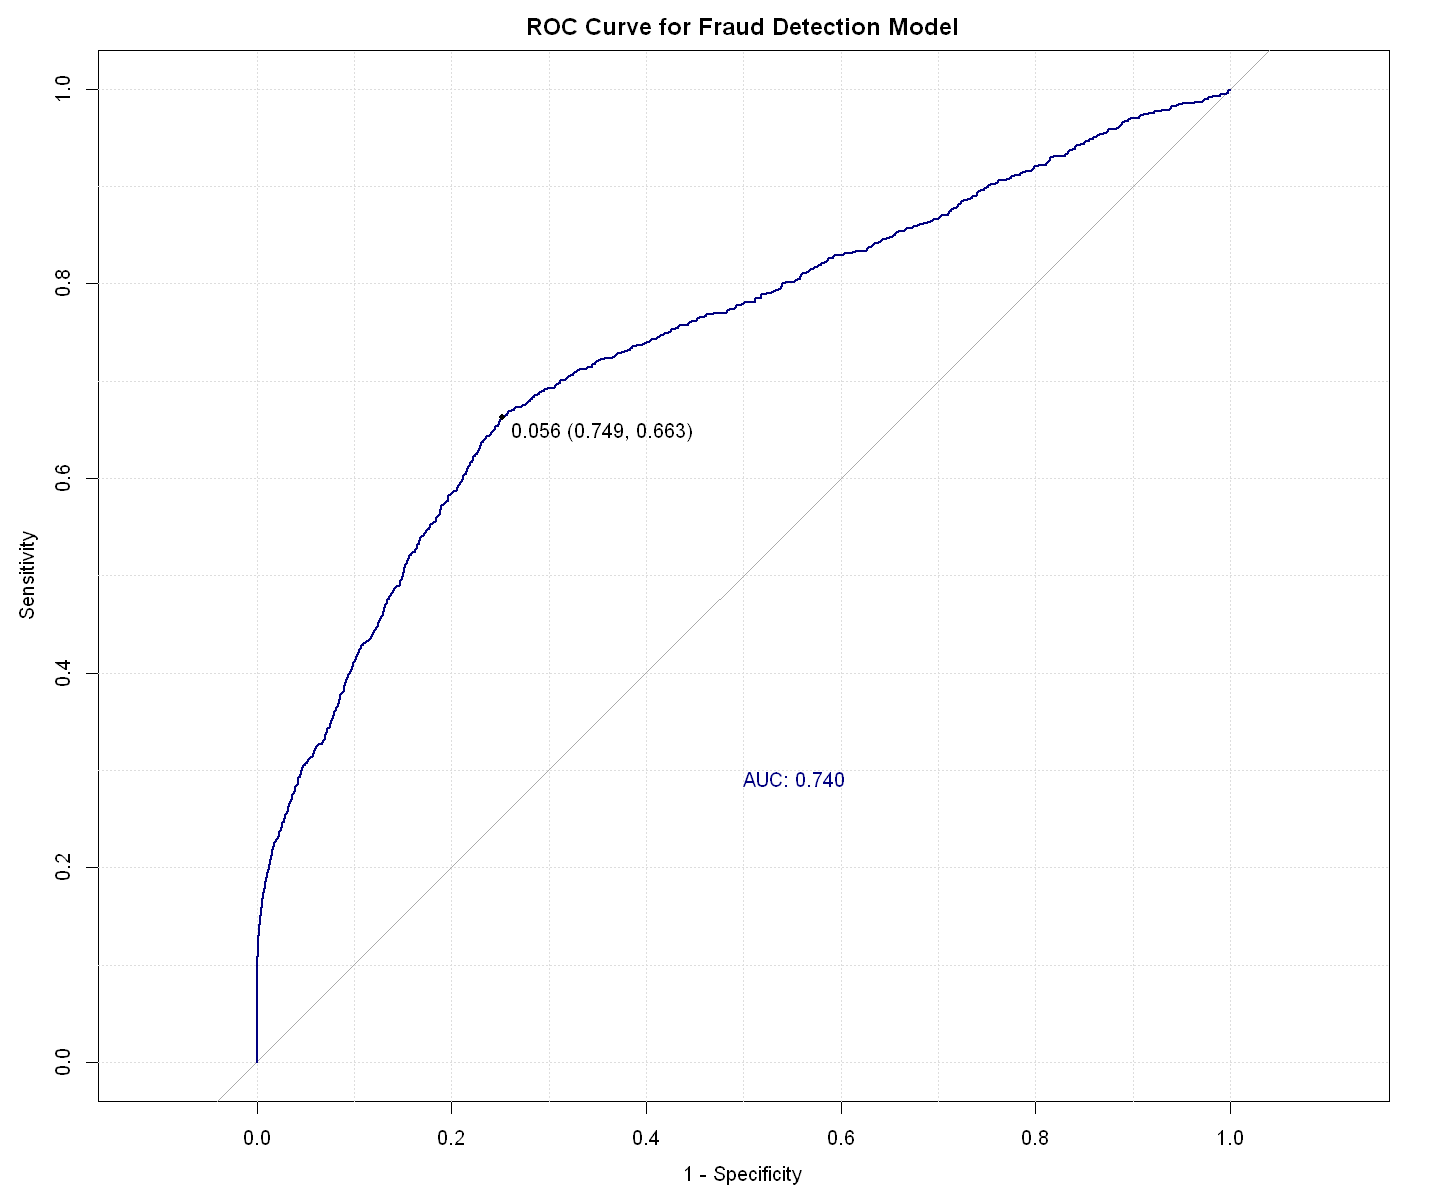

In [81]:

model <- glm(Is.Fraudulent ~ Transaction.Amount + Customer.Age + Account.Age.Days, data = fraud1, family = binomial)
summary(model)
predictions <- predict(model, newdata = fraud2, type = "response")
library(pROC)
roc <- roc(fraud2$Is.Fraudulent, predictions)
plot(roc, 
     main = "ROC Curve for Fraud Detection Model",
     col = "navy",                  # Set color of the curve
     lwd = 2,                       # Set line width
     legacy.axes = TRUE,            # Use legacy axes
     print.auc = TRUE,              # Print AUC on the plot
     print.thres = "best",          # Print threshold for best Youden index
     print.auc.y = 0.3,             # Set y-coordinate for AUC label
     print.thres.best.method = "youden",  # Method to determine threshold for best Youden index
     grid = TRUE)                   # Add grid lines


<div style="color: #9955BB; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
This logistic regression model examines the likelihood of fraud based on three predictors: Transaction Amount, Customer Age, and Account Age. The results indicate that Transaction Amount and Account Age have significant effects on fraud probability, as evidenced by their low p-values and high z-values. However, Customer Age does not appear to be a significant predictor. The model fits the data well, as indicated by the low deviance values and AIC. Overall, Transaction Amount and Account Age are crucial factors in predicting fraud, while Customer Age seems to have little impact.
     </div>